<a href="https://colab.research.google.com/github/jardel-alves0314/analise-de-dados-puc-2023/blob/main/mvp_sprint_1/mvp_sprint_1_analise_exploratoria_jardel_dos_anjos_alves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MVP de Análise de Dados e Boas Práticas**
##Profs: Tatiana Escovedo e Hugo Villamizar
##Aluno: Jardel dos Anjos Alves

#1.   Definição do problema

>O objetivo é analisar os últimos 5 anos (2018 - 2022) de cotações de ações negociadas no Brasil e determinar quais ações/ativos possuem um comportamento semelhante.
> 
> 
> 

> Como são múltiplas séries temporais no mesmo dataset e o objetivo é agrupar ações que possuem o mesmo comportamento técnicas de aprendizado não supervisionado são mais adequados nessa análise, tais como: Time Series Clustering / Análise de Agrupamento de Séries Temporais e K-MEANS.
> 
> 

> O resultado final é determinar a hipótese de que existem grupos de ações que se comportam de forma semelhante.



##1.1. Fonte dos dados


Os dados usados neste projeto são extrações de acões negociadas no Brasil.

A lista de ações negociadas no Brasil foram coletadas da seguinte página na internet: [https://www.dadosdemercado.com.br/bolsa/acoes](https://www.dadosdemercado.com.br/bolsa/acoes). 

Essa página contém os dados das ações que já foram negociadas no Brasil.


Depois de coletados os dados das ações, é feita a busca das cotações por período de cada uma delas usando a api do Yahoo! Finance.




Os dados coletados são:
  * lista_de_acoes_2023_04_08_parte_01.csv, ...parte_02 e ...parte_03
    * atributo(s):
      1. ticker - mneumônico do ativo/ação 

  * lista_de_cotacoes_2023_04_07 (parte_01, parte_02, parte_03) .csv
    * atributo(s):
      1. trading_date - data da cotação do ativo/ação na bolsa
      2. ticker - mneumônico do ativo/ação 
      3. open - valor do ativo/ação na abertura da bolsa
      4. high - maior valor alcançado do ativo/ação na bolsa no dia da cotação
      5. low - menor valor alcançado do ativo/ação na bolsa no dia da cotação
      6. close - valor do ativo/ação na hora do fechamento 
      7. adj_close - valor ajustado do valor do ativo/ação na hora do fechamento
      8. volume - volume negociado no dia da cotação

Depois da análise dos dados dos dataset acima, foi decidido importar outros datasets para tornar mais rica apresentação dos dados, principalmente a correlação que pode existir entre datasets diferentes.

  * lista_de_indices_bovespa_2023_04_11.csv
    * atributo(s):
      1. trading_date - data da cotação do ativo/ação na bolsa
      2. ticker - mneumônico do ativo/ação 
      3. open - valor do ativo/ação na abertura da bolsa
      4. high - maior valor alcançado do ativo/ação na bolsa no dia da cotação
      5. low - menor valor alcançado do ativo/ação na bolsa no dia da cotação
      6. close - valor do ativo/ação na hora do fechamento 
      7. adj_close - valor ajustado do valor do ativo/ação na hora do fechamento
      8. volume - volume negociado no dia da cotação

  * cotacao_dolar_2023_04_11.csv
    * atributo(s):
      1. trading_date - data da cotação do ativo/ação na bolsa
      2. ticker - mneumônico do ativo/ação 
      3. open - valor do ativo/ação na abertura da bolsa
      4. high - maior valor alcançado do ativo/ação na bolsa no dia da cotação
      5. low - menor valor alcançado do ativo/ação na bolsa no dia da cotação
      6. close - valor do ativo/ação na hora do fechamento 
      7. adj_close - valor ajustado do valor do ativo/ação na hora do fechamento
      8. volume - volume negociado no dia da cotação

Observação:

*   os notebooks que geraram dos dados estão disponíveis no repositório do GitHub, mas não é necessário executá-los novamente já que os arquivos gerados estão disponíveis no projeto criado lá.


--------------------------------------------------------------------------------

#2. Bibliotecas

###**Importando Bibliotecas**

In [118]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização

In [119]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
     


In [120]:
# formatando campos do tipo float
pd.options.display.float_format = '{:,.4f}'.format

###**Métodos e Funções**

###**médtodo carregar_arquivo**
objetivo: carregar um arquivo num dataframe do tipo Pandas

recebe como parâmetros:
*   url - o endereço ou caminho onde o arquivo está hospedado
*   separador - string que separa os campos numa linha dentro do arquivo
*   colunas_tipo - parâmetro opcional que contém a lista dos tipos das colunas do arquivo

retorna:
um Pandas dataframe





In [121]:
#Carrega um arquivo hospedado numa página na web num dataframe pandas 
def carregar_arquivo(url, separador = ',', colunas_tipos = None ):
  print("carregando arquivo:")
  print(url)
  return pd.read_csv(url, delimiter = separador, dtype = colunas_tipos)

###**método carregar_lista_de_arquivos**
objetivo: carregar vários arquivos num ÚNICO dataframe do tipo Pandas

recebe como parâmetros:
*   urls - lista de endereços ou caminhos onde os arquivos estão hospedados
*   separador - string que separa os campos numa linha dentro do arquivo
*   colunas_tipo - parâmetro opcional que contém a lista dos tipos das colunas do arquivo

retorna:
um Pandas dataframe

In [122]:
#Carrega uma lista de arquivos hospedados numa página na web num dataframe pandas, a função concatena o resultado de cada arquivo num único dataframe
def carregar_lista_de_arquivos(urls, separador = ',', colunas_tipos = None ):
  df = None

  for url in urls:     
    if df is None:
      df =  carregar_arquivo(url, separador, colunas_tipos)
    else:
      df_aux =  carregar_arquivo(url, separador, colunas_tipos)
      df =  pd.concat([df,df_aux])

  return df

###**método exibir_analise_descritiva**
objetivo: auxiliar na anállise do dataset, exibindo informações do dataset

recebe como parâmetros:
*  um daframe Pandas

retorna:
sem retorno

In [123]:
def exibir_analise_descritiva(dataset):
    print("informações sobre o dataset:")
    dataset.info()

    print()
    print("primeiras linhas do dataset:")
    print(dataset.head())

    print()
    print("últimas linhas do dataset:")
    print(dataset.tail(5))

    print()
    print("colunas do dataset:")
    print(dataset.dtypes)

    print()
    print("análise descritiva do dataset:")
    print(dataset.describe())

###**método exibir_histograma**
objetivo: exibir o histograma do dataset

recebe como parâmetros:
*  um daframe Pandas

retorna:
sem retorno

In [124]:
def exibir_histograma(dataset):
  # Histograma
  dataset.hist(figsize = (15,10))
  plt.show()

###**método exibir_graficos_de_densidade**
objetivo: exibir o gráfico de densidade do dataset

recebe como parâmetros:
*  um daframe Pandas
*  tamanho
retorna:
sem retorno

In [125]:
def exibir_graficos_de_densidade(dataset, tamanho = None):
# Density Plot
  dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = tamanho)
  plt.show()

###**método exibir_bloxplot**
objetivo: exibir o gráfico de densidade do dataset

recebe como parâmetros:
*  um daframe Pandas
*  tamanho
retorna:
sem retorno

In [126]:
def exibir_bloxplot(dataset, tamanho = None):
  dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = tamanho)
  plt.show()

###**método exibir_matriz_de_correlacao**
objetivo: exibir o gráfico com a matriz de correlação dos campos do dataset, na forma de um gráfico de calor

recebe como parâmetros:
*  um daframe Pandas
*  tamanho
retorna:
sem retorno

In [127]:
def exibir_matriz_de_correlacao(dataset):
# Matriz de Correlação com Matplotlib Seaborn
  sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', center=0, vmin=-1, vmax=1)

###**método exibir_matriz_de_correlacao_entre_datasets**
objetivo: exibir o gráfico com a matriz de correlação dos campos dos datasets, na forma de um gráfico de calor

recebe como parâmetros:
*  um daframe Pandas
*  tamanho
retorna:
sem retorno

In [128]:
def exibir_matriz_de_correlacao_entre_datasets(datasets, metodo):
  df = pd.concat(datasets)
    
  # Calculando a matriz de correlação
  corr_matrix = df.corr()
    
  # Plotando o gráfico de correlação
  plt.matshow(corr_matrix)
  plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
  plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
  plt.colorbar()
  plt.show()

###**método exibir_scater_plot**
objetivo: exibir o gráfico do tipo scater plot

recebe como parâmetros:
*  dataset - um daframe Pandas
*  coluna  - nome da coluna analisada
*  altura  - ajusta a altura do gráfico

retorna:
sem retorno

In [129]:
def exibir_scater_plot(dataset, coluna, altura):
    sns.pairplot(dataset, hue = coluna, height = altura)

###**método exibir_grafico_nulidade**
objetivo: exibir o gráfico com a matriz de correlação dos campos dos datasets, na forma de um gráfico de calor

recebe como parâmetros:
*  dataset - um daframe Pandas
*  colunas - lista com os nomes das colunas analisadas
*  troca_zero_por_nulo - nos campos numéricos, quando o valor da coluna for zero ele será substituído por nulo

retorna:
cópia do dataset

In [130]:
def exibir_grafico_nulidade(dataset, colunas = [], troca_por_nulo = None):
  # recuperando os nomes das colunas
  colunas = list(dataset.columns)
  
  # o novo dataset irá conter todas as colunas com exceção da última (classe)  
  if (colunas is None) or (colunas == []):
    copia = dataset.copy()
  else:
    copia = dataset[colunas].copy()

  # substituindo o valor do parâmetro informado por NaN
  if troca_por_nulo is not None:
    copia.replace(troca_por_nulo, np.nan, inplace=True)

  # exibindo visualização matricial da nulidade do dataset
  ms.matrix(copia)

  return copia

###**método preencher_nulos_por_interpolacao**

objetivo: método que preeche os valores nulos/missing com um valor calculado de acordo com o método escolhido

recebe como parâmetros:
*  dataset - um dataframe Pandas

*  campo_id_serie_temporal - parâmetro que identifica a série temporal dentro do dataset

*  coluna_data - parâmetro que identifica a coluna temporal da série

*  colunas - parâmetro que identifica as colunas que serão processadas 

*  renomeia_coluna - parâmetro booleano que indica se vai ser criada uma coluna nova ou o valor calculado vai ser atribuido à coluna original

*  metodo - parâmetro que indica qual método será utilizado no preenchimento da coluna com nulo/missing:
  * "ultimo_valor": preenche com o último valor válido anterior na série

  * "diferenca": preenche com a diferença entre valores válidos

  * "acumulado": acumula os valores do campo

  * "media": preenche com a média dos valores na série temporal por campo_id_serie_temporal

  * "mediana": preenche com a mediana dos valores na série temporal por campo_id_serie_temporal

  * "interpolacao_linear": faz a interpolação do valor nulo/missing usando os valores preenchidos anterior e posterior à linha

retorna:
cópia do dataset

fontes: 

[A Collection of Must-Know Techniques for Working with Time Series Data in Python](https://towardsdatascience.com/a-collection-of-must-know-techniques-for-working-with-time-series-data-in-python-7c01d199b184#976f)


[Time Series Clustering — Deriving Trends and Archetypes from Sequential Data](https://towardsdatascience.com/time-series-clustering-deriving-trends-and-archetypes-from-sequential-data-bb87783312b4)


[A Guide to Handling Missing values in Python](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python)

In [131]:
def preencher_nulos_na_serie_temporal(dataset, campo_id_serie_temporal, coluna_data, colunas, renomeia_coluna, metodo):
  copia = dataset.copy()
  dicionario = {}
  chaves = dataset[campo_id_serie_temporal].unique()
  contador = 0
  for chave in chaves:    

    df = dataset[dataset[campo_id_serie_temporal] == chave].set_index([campo_id_serie_temporal,coluna_data])[colunas]
    if metodo == "ultimo_valor":
      for coluna in colunas:
        df[f"{coluna}_{metodo}"] = df[coluna].fillna(df[coluna].ffill())  
       
    elif metodo ==  "diferenca":
      for coluna in colunas:
        df[f"{coluna}_{metodo}"] = df[coluna].fillna(df[coluna].diff())  
        # df[f"{coluna}_{metodo}"] = df[coluna].diff()

    elif metodo ==  "acumulado":      
      for coluna in colunas:
        df[f"{coluna}_{metodo}"] = df[coluna].cumsum()

    elif metodo ==  "media":
      for coluna in colunas:
        df[f"{coluna}_{metodo}"] = df[coluna].fillna(df[coluna].mean())      

    elif metodo == "mediana":   
      for coluna in colunas:
        df[f"{coluna}_{metodo}"] = df[coluna].fillna(df[coluna].median())                  

    elif metodo ==  "interpolacao_linear":
      for coluna in colunas:
        df[f"{coluna}_{metodo}"] = df[coluna].interpolate(limit_direction = "both")   

    else:
      print(f"Esse método não existe: {metodo}")         
      return None

    dicionario[chave] = df

  for chave, df in dicionario.items():
    for coluna in colunas:
      if renomeia_coluna:
        copia.loc[copia[campo_id_serie_temporal]==chave,f"{coluna}_{metodo}"] = df[f"{coluna}_{metodo}"].values.flatten()
      else:
        copia.loc[copia[campo_id_serie_temporal]==chave,coluna] = df[f"{coluna}_{metodo}"].values.flatten()
      

  return copia



###**método exibir_relatorio_campos_missing**
objetivo: exibir o gráfico com a matriz de correlação dos campos dos datasets, na forma de um gráfico de calor

recebe como parâmetros:
*  dataset - um daframe Pandas
*  campo_id - campo que identifica o registro
*  colunas - lista com os nomes das colunas analisadas

retorna:

dataset - Index: [campo_id, coluna]                                      Columns: [total_nulos, total_nao_nulos, percentual_nulos]



In [132]:
def exibir_relatorio_campos_missing(dataset, campo_id, colunas):
  chaves = dataset[campo_id].unique()
  df = None
  for coluna in colunas:
    if df is None:
          df = pd.DataFrame({campo_id: chaves,
                             
                             "coluna" : coluna,

                             "total_nulos": [dataset_cotacoes_sem_missing[dataset_cotacoes_sem_missing[campo_id] == chave][coluna].isnull().sum() for chave in chaves],

                             "total_nao_nulos": [dataset_cotacoes_sem_missing[dataset_cotacoes_sem_missing[campo_id] == chave][coluna].notnull().sum() for chave in chaves],

                             "percentual_nulos":[100 * (dataset_cotacoes_sem_missing[dataset_cotacoes_sem_missing[campo_id] == chave][coluna].isnull().sum() /
                                                        dataset_cotacoes_sem_missing[dataset_cotacoes_sem_missing[campo_id] == chave][campo_id].count()) for chave in chaves]
                   })
    else:
      df_aux = pd.DataFrame({campo_id: chaves,
                             
                             "coluna" : coluna,

                             "total_nulos": [dataset_cotacoes_sem_missing[dataset_cotacoes_sem_missing[campo_id] == chave][coluna].isnull().sum() for chave in chaves],

                             "total_nao_nulos": [dataset_cotacoes_sem_missing[dataset_cotacoes_sem_missing[campo_id] == chave][coluna].notnull().sum() for chave in chaves],

                             "percentual_nulos":[100 * (dataset_cotacoes_sem_missing[dataset_cotacoes_sem_missing[campo_id] == chave][coluna].isnull().sum() /
                                                        dataset_cotacoes_sem_missing[dataset_cotacoes_sem_missing[campo_id] == chave][campo_id].count()) for chave in chaves]
                   })
            
      df =  pd.concat([df,df_aux])

  print(df)
  
  return df

###**método remover_serie_temporal**
objetivo: exibir o gráfico com a matriz de correlação dos campos dos datasets, na forma de um gráfico de calor

recebe como parâmetros:
*  dataset - um daframe Pandas
*  campo_id - campo que identifica o registro
*  lista_series_temporais - lista com os nomes das séries temporais contidas no dataset que serão removidas

retorna:

dataset - cópia do dataset original sem os registros excluídos



In [133]:
def remover_serie_temporal(dataset, campo_id, lista_series_temporais):
  copia = dataset.copy()
  for item in lista_series_temporais:
    indice = copia[copia[campo_id] == item].index
    copia = copia.drop(indice)
  return     copia

###**método normalizar_dataset**
objetivo: executa a normalização do dataset todo

recebe como parâmetros:
*  dataset - um daframe Pandas
*  indice_coluna_inicial
*  indice_coluna_final

retorna:

dataset - cópia do dataset original já normalizado



In [134]:
def normalizar_dataset(dataset, indice_coluna_inicial, indice_coluna_final):
  copia = dataset.copy()

  #subset que vai ser normalizado
  df = copia.iloc[:,indice_coluna_inicial:indice_coluna_final]

  # Cria um objeto MinMaxScaler
  scaler = MinMaxScaler()
  
  #  calcula os valores mínimo e máximo para cada coluna do dataset, necessários para aplicar a normalização.
  scaler.fit_transform(df)

  # cria uma matriz de dados normalizados
  normalizado = scaler.transform(df)  

  # cria o novo dataset com as colunas normalizadas
  df_normalizado = pd.DataFrame(normalizado, columns=df.columns)

  #substitui na cópia do dataset os valores normalizados das colunas
  for coluna in df_normalizado.columns:
    copia[coluna] = df_normalizado[coluna]

  return copia

###**método padronizar_dataset**
objetivo: executa a padronização do dataset todo

recebe como parâmetros:
*  dataset - um daframe Pandas
*  indice_coluna_inicial
*  indice_coluna_final

retorna:

dataset - cópia do dataset original já padronizado



In [135]:
def padronizar_dataset(dataset, indice_coluna_inicial, indice_coluna_final):
  copia = dataset.copy()

  #subset que vai ser normalizado
  df = copia.iloc[:,indice_coluna_inicial:indice_coluna_final]

  # Cria um objeto MinMaxScaler
  scaler = StandardScaler()

  # calcula as médias e desvios padrões de cada coluna do DataFrame. 
  scaler.fit_transform(df)

  # cria uma matriz com os dados padronizados
  padronizado = scaler.transform(df)  

  # cria o novo dataset com as colunas padronizadas
  df_padronizado = pd.DataFrame(padronizado, columns=df.columns)

  # substitui na cópia do dataset os novos valores calculados
  for coluna in df_padronizado.columns:
    copia[coluna] = df_padronizado[coluna]

  return copia

#3. Carregando os Dados

### Carregando Arquvivos do GitHub: lista_de_acoes_2023_04_08.csv

In [136]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/lista_de_acoes_2023_04_08_v2.csv"

# Lê o arquivo, as colunas já foram definidas na extração 
dataset_acoes = carregar_arquivo(url)

dataset_acoes

carregando arquivo:
https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/lista_de_acoes_2023_04_08_v2.csv


,ticker
0,AALR3.SA
1,ABCB4.SA
2,ABEV3.SA
3,AERI3.SA
4,AESB3.SA
...,...
521,WIZS3.SA
522,WLMM3.SA
523,WLMM4.SA
524,YDUQ3.SA


### Carregando Arquvivos do GitHub: lista_de_cotacoes_2023_04_08_parte_01, ...parte_02.csv e ...parte_03.csv

In [137]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
lista_urls =["https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/lista_de_cotacoes_2023_04_08_parte_01.csv",
             "https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/lista_de_cotacoes_2023_04_08_parte_02.csv",
             "https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/lista_de_cotacoes_2023_04_08_parte_03.csv"]

# Lê o arquivo, as colunas já foram definidas na extração 
dataset_cotacoes = carregar_lista_de_arquivos(lista_urls)

dataset_cotacoes

carregando arquivo:
https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/lista_de_cotacoes_2023_04_08_parte_01.csv
carregando arquivo:
https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/lista_de_cotacoes_2023_04_08_parte_02.csv
carregando arquivo:
https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/lista_de_cotacoes_2023_04_08_parte_03.csv


,trading_date,ticker,open,high,low,close,adj_close,volume
0,2018-01-02,AALR3.SA,14.9400,15.1600,14.7000,14.8900,14.7403,94500
1,2018-01-03,AALR3.SA,14.8900,15.3200,14.7900,14.9600,14.8096,584700
2,2018-01-04,AALR3.SA,15.0000,15.1600,14.8100,15.0900,14.9383,290100
3,2018-01-05,AALR3.SA,15.0500,15.1700,14.9500,15.0500,14.8987,131500
4,2018-01-08,AALR3.SA,15.0500,15.1000,14.6200,14.7900,14.6414,244500
...,...,...,...,...,...,...,...,...
114461,2022-12-23,ZAMP3.SA,4.9700,5.6200,4.9700,5.6200,5.6200,887100
114462,2022-12-26,ZAMP3.SA,5.5000,5.8600,5.4300,5.4800,5.4800,760000
114463,2022-12-27,ZAMP3.SA,5.5200,5.5800,5.2100,5.2800,5.2800,920700
114464,2022-12-28,ZAMP3.SA,5.3500,5.4100,5.2200,5.3500,5.3500,421100


### Carregando Arquvivos do GitHub: lista_de_indices_bovespa_2023_04_11.csv

In [138]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/lista_de_indices_bovespa_2023_04_11.csv"

# Lê o arquivo, as colunas já foram definidas na extração 
dataset_indice_bovespa = carregar_arquivo(url)

dataset_indice_bovespa

carregando arquivo:
https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/lista_de_indices_bovespa_2023_04_11.csv


,trading_date,ticker,open,high,low,close,adj_close,volume
0,2018-01-02,IBOVESPA,"76,403.0000","77,909.0000","76,403.0000","77,891.0000","77,891.0000",2880300
1,2018-01-03,IBOVESPA,"77,889.0000","78,414.0000","77,602.0000","77,995.0000","77,995.0000",3142200
2,2018-01-04,IBOVESPA,"77,998.0000","79,135.0000","77,998.0000","78,647.0000","78,647.0000",3486100
3,2018-01-05,IBOVESPA,"78,644.0000","79,071.0000","78,218.0000","79,071.0000","79,071.0000",2747100
4,2018-01-08,IBOVESPA,"79,070.0000","79,395.0000","78,631.0000","79,379.0000","79,379.0000",2550800
...,...,...,...,...,...,...,...,...
1233,2022-12-23,IBOVESPA,"107,552.0000","109,994.0000","107,552.0000","109,698.0000","109,698.0000",12847100
1234,2022-12-26,IBOVESPA,"109,699.0000","109,755.0000","108,309.0000","108,738.0000","108,738.0000",5219500
1235,2022-12-27,IBOVESPA,"108,739.0000","109,353.0000","107,418.0000","108,347.0000","108,347.0000",11158100
1236,2022-12-28,IBOVESPA,"108,578.0000","110,536.0000","108,578.0000","110,237.0000","110,237.0000",11193900


### Carregando Arquvivos do GitHub: cotacao_dolar_2023_04_11.csv

In [139]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/cotacao_dolar_2023_04_11.csv"

# Lê o arquivo, as colunas já foram definidas na extração 
dataset_cotacao_dolar = carregar_arquivo(url)

dataset_cotacao_dolar

carregando arquivo:
https://raw.githubusercontent.com//jardel-alves0314/analise-de-dados-puc-2023-sprint_1/main/cotacao_dolar_2023_04_11.csv


,trading_date,ticker,open,high,low,close,adj_close,volume
0,2018-01-01,DOLAR,3.3105,3.3117,3.3093,3.3076,3.3076,0
1,2018-01-02,DOLAR,3.3108,3.3127,3.2585,3.3110,3.3110,0
2,2018-01-03,DOLAR,3.2574,3.2638,3.2410,3.2578,3.2578,0
3,2018-01-04,DOLAR,3.2356,3.2410,3.2214,3.2355,3.2355,0
4,2018-01-05,DOLAR,3.2328,3.2479,3.2256,3.2331,3.2331,0
...,...,...,...,...,...,...,...,...
1299,2022-12-26,DOLAR,5.1643,5.2042,5.1625,5.1643,5.1643,0
1300,2022-12-27,DOLAR,5.2175,5.2916,5.1250,5.2175,5.2175,0
1301,2022-12-28,DOLAR,5.2923,5.2927,5.2507,5.2923,5.2923,0
1302,2022-12-29,DOLAR,5.2668,5.2811,5.1894,5.2668,5.2668,0


#4. Análise dos Dados

##4.1. Estatísticas Descritivas

##**dataset AÇÕES**

In [140]:
exibir_analise_descritiva(dataset_acoes)

informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ticker  526 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB

primeiras linhas do dataset:
     ticker
0  AALR3.SA
1  ABCB4.SA
2  ABEV3.SA
3  AERI3.SA
4  AESB3.SA

últimas linhas do dataset:
       ticker
521  WIZS3.SA
522  WLMM3.SA
523  WLMM4.SA
524  YDUQ3.SA
525  ZAMP3.SA

colunas do dataset:
ticker    object
dtype: object

análise descritiva do dataset:
          ticker
count        526
unique       524
top     IGTI4.SA
freq           2


##Analisando o resultado:
O dataset AÇÕES é o resultado da extração de uma página na web.

Contém um único campo textual que representa o código da ação. 

Por exemplo PETR4.SA é uma ação preferêncial da Petrobras SA.

A frequencia igual a 2, indica que existe algum valor repetido no dataset, era esperado valores únicos nesse dataset.

In [141]:
# aplicando funções de agrupamemnto para descobrir quais códigos (ticker) das ações está reptido
df = dataset_acoes.groupby("ticker")["ticker"].count()

#ordenando de forma descentente para localizar as ações repetidas
df = df.sort_values(ascending=False)
df

ticker
IGTI4.SA     2
IGTI3.SA     2
AALR3.SA     1
MRSA3B.SA    1
MRSA6B.SA    1
            ..
CTNM4.SA     1
CTNM3.SA     1
CTKA4.SA     1
CTKA3.SA     1
ZAMP3.SA     1
Name: ticker, Length: 524, dtype: int64

##Analisando o resultado:

Os códigos IGTI4.SA e IGTI3.SA estão repetidos, será necessário alguma ação para tratar essa situação.

##**dataset COTAÇÕES**

In [142]:
exibir_analise_descritiva(dataset_cotacoes)

informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 514464 entries, 0 to 114465
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   trading_date  514464 non-null  object 
 1   ticker        514464 non-null  object 
 2   open          514464 non-null  float64
 3   high          514464 non-null  float64
 4   low           514464 non-null  float64
 5   close         514464 non-null  float64
 6   adj_close     514464 non-null  float64
 7   volume        514464 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 35.3+ MB

primeiras linhas do dataset:
  trading_date    ticker    open    high     low   close  adj_close  volume
0   2018-01-02  AALR3.SA 14.9400 15.1600 14.7000 14.8900    14.7403   94500
1   2018-01-03  AALR3.SA 14.8900 15.3200 14.7900 14.9600    14.8096  584700
2   2018-01-04  AALR3.SA 15.0000 15.1600 14.8100 15.0900    14.9383  290100
3   2018-01-05  AALR3.SA

In [143]:
df = dataset_cotacoes.groupby("ticker").size()
df
df.describe()

count     465.0000
mean    1,106.3742
std       298.1430
min       284.0000
25%     1,239.0000
50%     1,239.0000
75%     1,239.0000
max     2,478.0000
dtype: float64

##**dataset ÍNDICES BOVESPA**

In [144]:
exibir_analise_descritiva(dataset_indice_bovespa)

informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trading_date  1238 non-null   object 
 1   ticker        1238 non-null   object 
 2   open          1238 non-null   float64
 3   high          1238 non-null   float64
 4   low           1238 non-null   float64
 5   close         1238 non-null   float64
 6   adj_close     1238 non-null   float64
 7   volume        1238 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 77.5+ KB

primeiras linhas do dataset:
  trading_date    ticker        open        high         low       close  \
0   2018-01-02  IBOVESPA 76,403.0000 77,909.0000 76,403.0000 77,891.0000   
1   2018-01-03  IBOVESPA 77,889.0000 78,414.0000 77,602.0000 77,995.0000   
2   2018-01-04  IBOVESPA 77,998.0000 79,135.0000 77,998.0000 78,647.0000   
3   2018-01-05  IBOVESPA 78,644.0000 7

##**dataset COTAÇÕES DO DÓLAR**

In [145]:
exibir_analise_descritiva(dataset_cotacao_dolar)

informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trading_date  1304 non-null   object 
 1   ticker        1304 non-null   object 
 2   open          1304 non-null   float64
 3   high          1304 non-null   float64
 4   low           1304 non-null   float64
 5   close         1304 non-null   float64
 6   adj_close     1304 non-null   float64
 7   volume        1304 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 81.6+ KB

primeiras linhas do dataset:
  trading_date ticker   open   high    low  close  adj_close  volume
0   2018-01-01  DOLAR 3.3105 3.3117 3.3093 3.3076     3.3076       0
1   2018-01-02  DOLAR 3.3108 3.3127 3.2585 3.3110     3.3110       0
2   2018-01-03  DOLAR 3.2574 3.2638 3.2410 3.2578     3.2578       0
3   2018-01-04  DOLAR 3.2356 3.2410 3.2214 3.2355     3.2355      

##4.1. Visualizações Unimodais

###4.1.1. HISTOGRAMA

###Histograma COTAÇÃO DE AÇÕES (para uma ação: PETR4.SA)

Observação: o histograma para o dataset completo estava causando distorções, por isso foi aplicado um filtro para uma determinada ação, no caso a PETR4.SA.

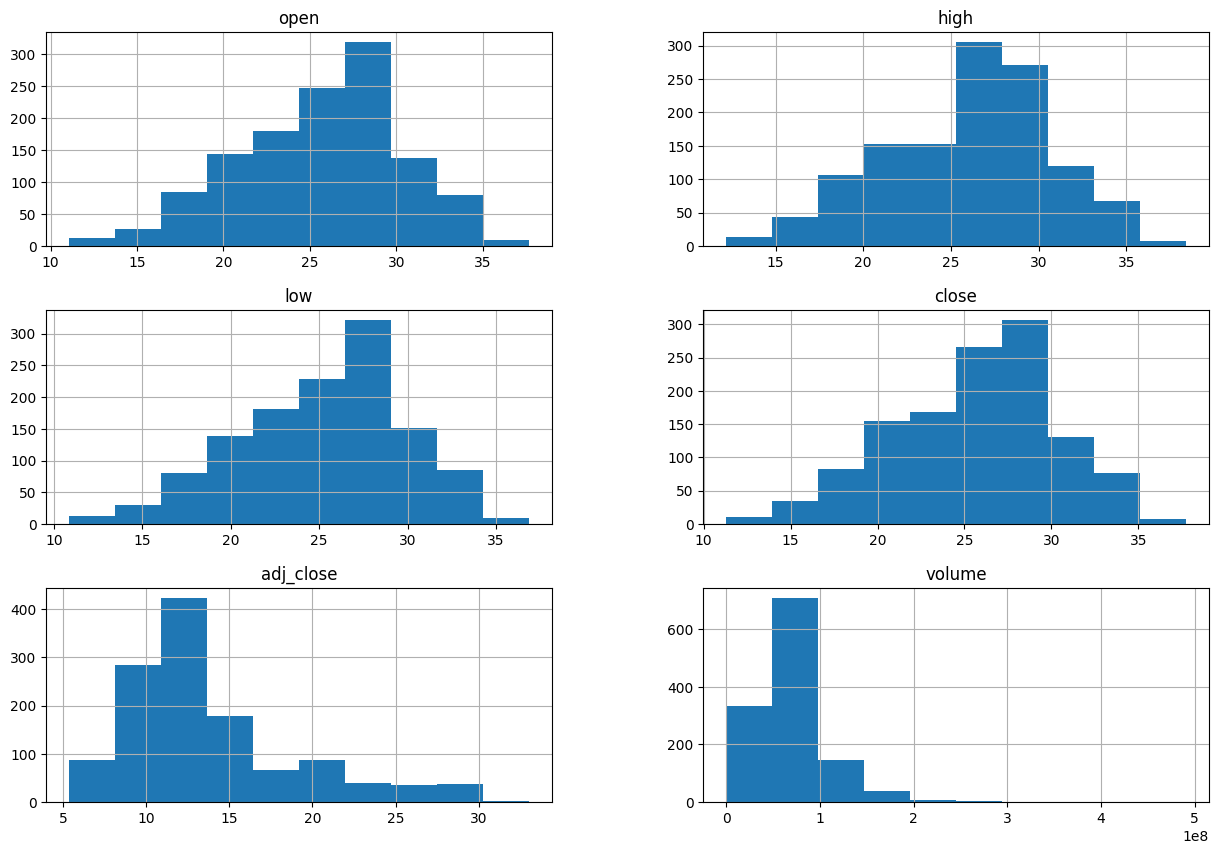

In [146]:
df_petr4_sa = dataset_cotacoes.where(dataset_cotacoes["ticker"] == "PETR4.SA")
exibir_histograma(df_petr4_sa,)

###Analisando o resultado:

1. As colunas que representam os valores das ações open(abertura), low(menor cotação do dia), high(maior cotação do dia) e close(valor da cotação no fechamento) são positivos.
2. Os histogramas para as colunas open(abertura), low(menor cotação do dia), high(maior cotação do dia) e close(valor da cotação no fechamento) estão próximos de uma distribuição normal.

3. A coluna adj_close(valor da ajustado da contação no fechamento) possui apenas valores positivos.

###Histograma COTAÇÃO DE AÇÕES (para uma ação: PETR4.SA, de 2022-01-01 a 2022-12-31)

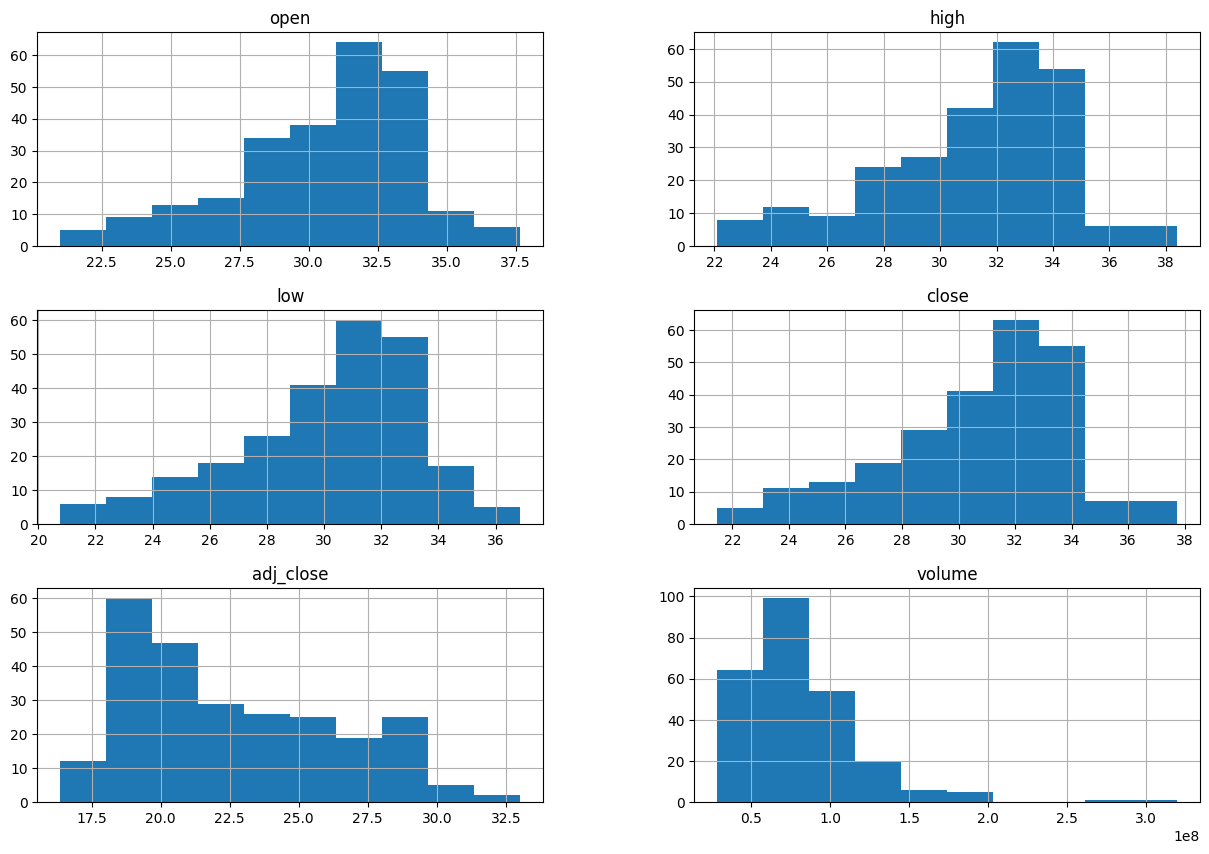

In [147]:
df_petr4_sa = dataset_cotacoes.where(dataset_cotacoes["ticker"] == "PETR4.SA").loc[dataset_cotacoes["trading_date"].between("2022-01-01", "2022-12-31")]
exibir_histograma(df_petr4_sa)

##Analisando o resultado:

1. O volume diminuiu pois está sendo analisado um período menor
2. Os gráficos são semelhantes, o sentido da distribuição não mudou

###Histograma ÍNDICE BOVESPA

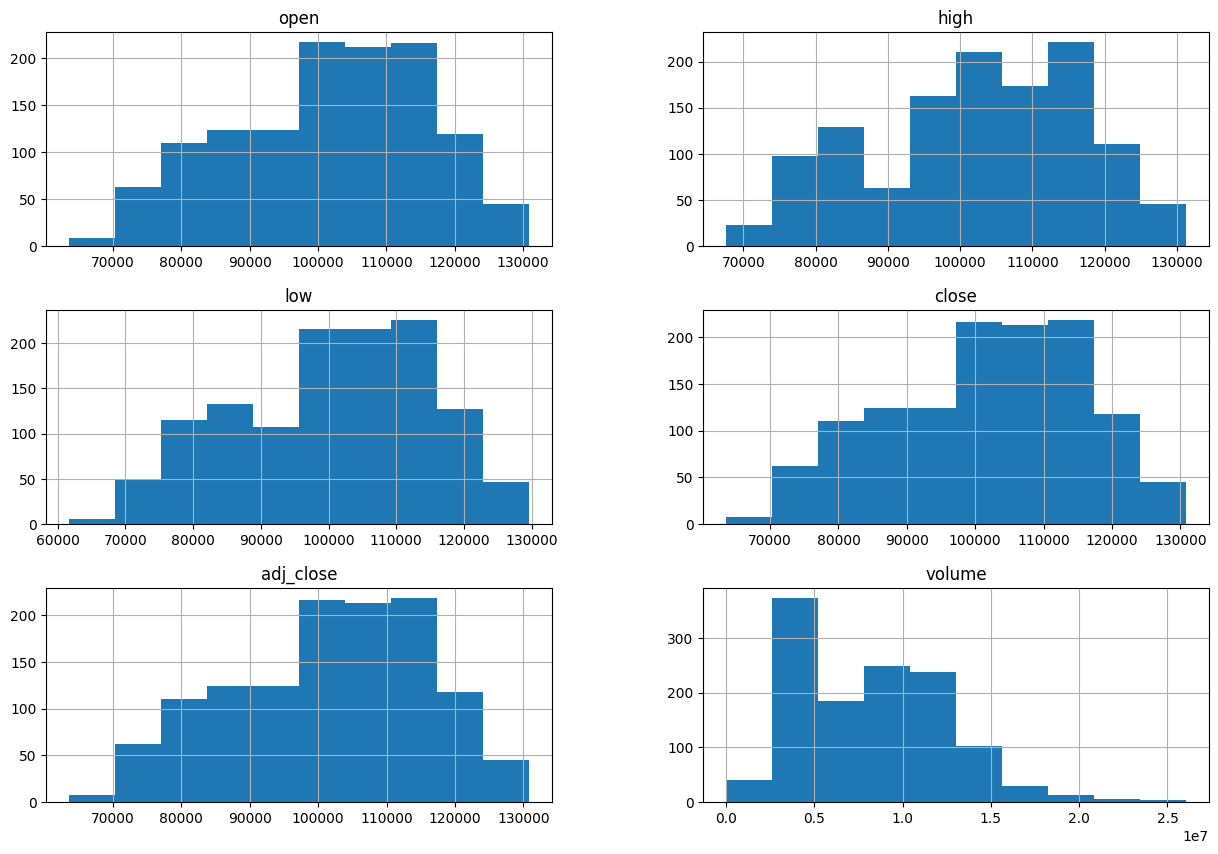

In [148]:
exibir_histograma(dataset_indice_bovespa)

###4.1.2. GRÁFICO DE DENSIDADE

###Gráfico de Densidade COTAÇÃO DE AÇÕES (PETR4.SA)

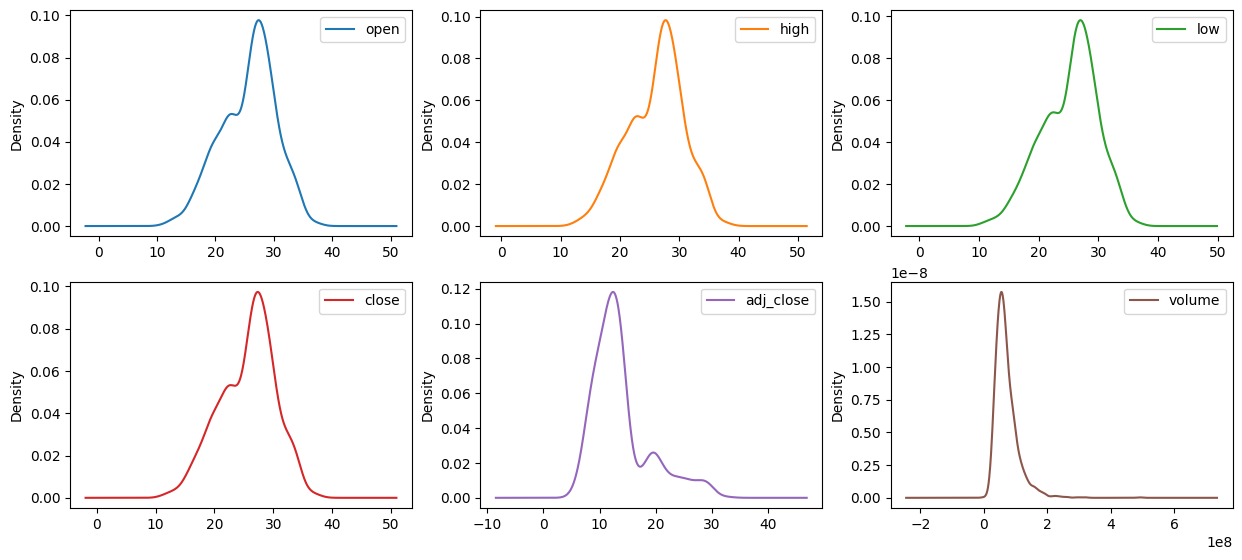

In [149]:
df_petr4_sa = dataset_cotacoes.where(dataset_cotacoes["ticker"] == "PETR4.SA")
exibir_graficos_de_densidade(df_petr4_sa,(15,10))

###Gráfico de Densidade COTAÇÃO DE AÇÕES (PETRA.SA, de 2022-01-01 a 2022-12-31)

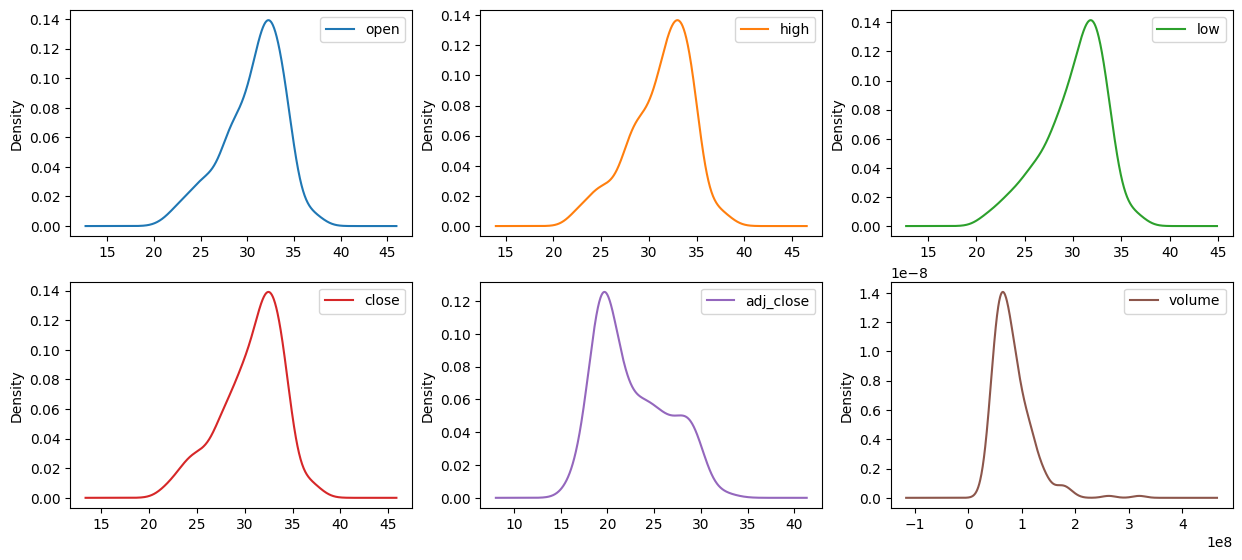

In [150]:
df_petr4_sa = dataset_cotacoes.where(dataset_cotacoes["ticker"] == "PETR4.SA").loc[dataset_cotacoes["trading_date"].between("2022-01-01", "2022-12-31")]
exibir_graficos_de_densidade(df_petr4_sa,(15,10))

###4.1.3. BOX PLOT

###Gráfico BOX PLOT (PETR4.SA)

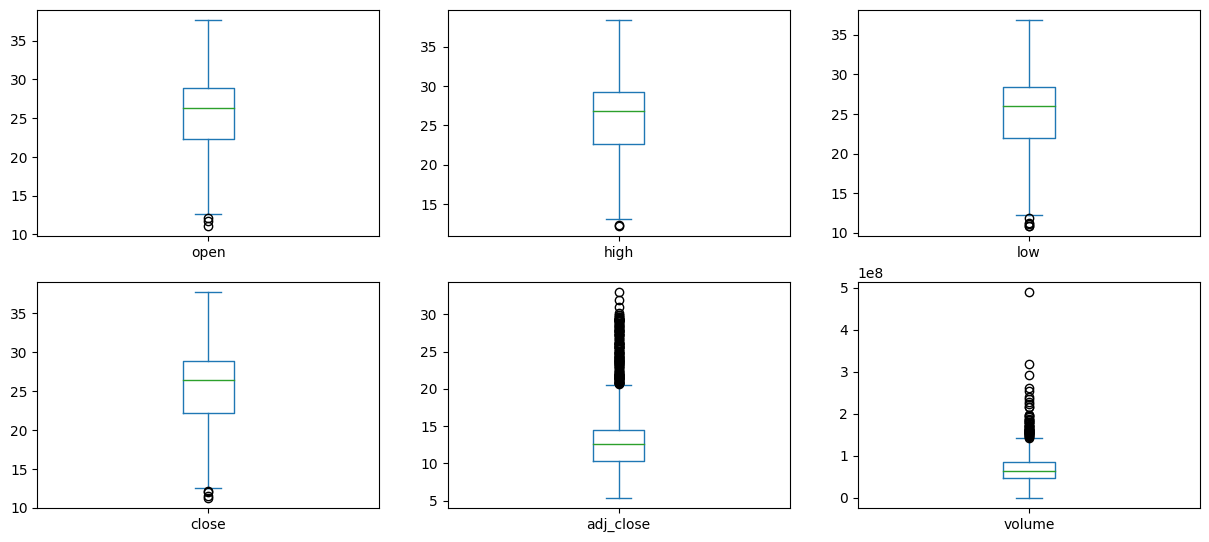

In [151]:
df_petr4_sa = dataset_cotacoes.where(dataset_cotacoes["ticker"] == "PETR4.SA")
exibir_bloxplot(df_petr4_sa,(15,10))

###4.1.4. MATRIZ DE CORRELAÇÃO

###Matriz de Correlação COTAÇÃO DAS AÇÕES

O resultado mostra que, excetuando-se a coluna VOLUME, todas as outras colunas são altamente relacionadas.

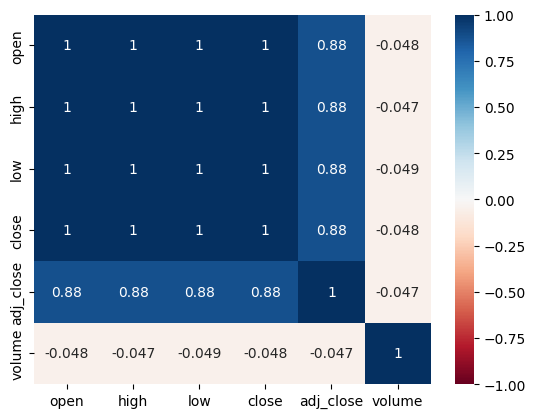

In [152]:
exibir_matriz_de_correlacao(dataset_cotacoes)

###Matriz de Correlação COTAÇÃO DAS AÇÕES (PETR4.SA)

O resultado mostra que, excetuando-se a coluna VOLUME, todas as outras colunas são altamente relacionadas.
Não houve uma mudança significativa ao se filtrar por uma determinada ação.

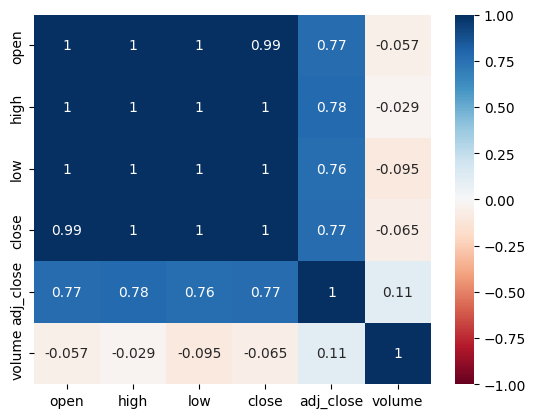

In [153]:
df_petr4_sa = dataset_cotacoes.where(dataset_cotacoes["ticker"] == "PETR4.SA")
exibir_matriz_de_correlacao(df_petr4_sa)

###Matriz de Correlação COTAÇÃO DAS AÇÕES (PETR4.SA) x ÍNDICE BOVESPA

Os dois datasets possuem a mesma estrutura. Para essa análise, apenas algumas colunas serão utilizadas.

1. trading_date - data da cotação do ativo/ação na bolsa
2. ticker - mneumônico do ativo/ação 
3. open - valor do ativo/ação na abertura da bolsa
4. high - maior valor alcançado do ativo/ação na bolsa no dia da cotação
5. low - menor valor alcançado do ativo/ação na bolsa no dia da cotação
6. close - valor do ativo/ação na hora do fechamento 
7. adj_close - valor ajustado do valor do ativo/ação na hora do fechamento
8. volume - volume negociado no dia da cotação

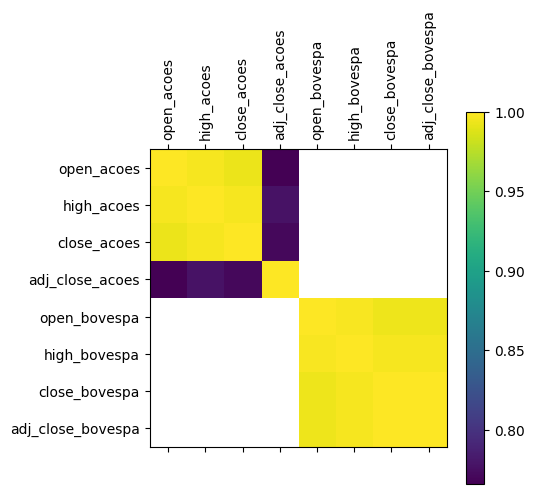

In [154]:
# filtrando pela PETR4.SA
df_petr4_sa = dataset_cotacoes.where(dataset_cotacoes["ticker"] == "PETR4.SA")

# selecionando as colunas desejadas
df_cotacoes = df_petr4_sa[["open","high","close","adj_close"]].rename(columns={"open":"open_acoes","high":"high_acoes","close":"close_acoes","adj_close":"adj_close_acoes"})

df_ibovespa = dataset_indice_bovespa[["open","high","close","adj_close"]].rename(columns={"open":"open_bovespa","high":"high_bovespa","close":"close_bovespa","adj_close":"adj_close_bovespa"})

exibir_matriz_de_correlacao_entre_datasets([df_cotacoes,df_ibovespa], "pearson")


###Resultado
Não há correlação entre os dois datasets.

###Matriz de Correlação COTAÇÃO DAS AÇÕES (PETR4.SA) x COTAÇÃO DO DÓLAR

Os dois datasets possuem a mesma estrutura. Para essa análise, apenas algumas colunas serão utilizadas.

1. trading_date - data da cotação do ativo/ação na bolsa
2. ticker - mneumônico do ativo/ação 
3. open - valor do ativo/ação na abertura da bolsa
4. high - maior valor alcançado do ativo/ação na bolsa no dia da cotação
5. low - menor valor alcançado do ativo/ação na bolsa no dia da cotação
6. close - valor do ativo/ação na hora do fechamento 
7. adj_close - valor ajustado do valor do ativo/ação na hora do fechamento
8. volume - volume negociado no dia da cotação

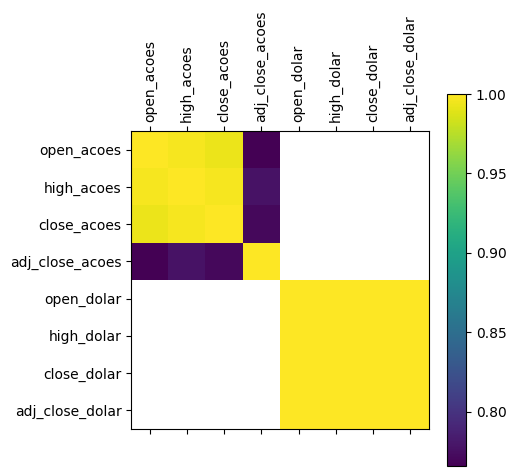

In [155]:
# filtrando pela PETR4.SA
df_petr4_sa = dataset_cotacoes.where(dataset_cotacoes["ticker"] == "PETR4.SA")
df_trading_date = df_petr4_sa["trading_date"]

# selecionando as colunas desejadas
df_cotacoes = df_petr4_sa[["open","high","close","adj_close"]].rename(columns={"open":"open_acoes","high":"high_acoes","close":"close_acoes","adj_close":"adj_close_acoes"})

# filtrando a cotação do dólar igual a contação da PETRA.SA
df_dolar = pd.merge(dataset_cotacao_dolar, df_trading_date, on="trading_date", how="inner")

# selecionando as colunas desejadas
df_dolar = df_dolar[["open","high","close","adj_close"]].rename(columns={"open":"open_dolar","high":"high_dolar","close":"close_dolar","adj_close":"adj_close_dolar"})

exibir_matriz_de_correlacao_entre_datasets([df_cotacoes,df_dolar], "pearson")


###4.1.5. Scatter Plot

observação: foi aplicado um filtro no dataset para esse gráfico, pois ficaria ilegível com o dataset completo

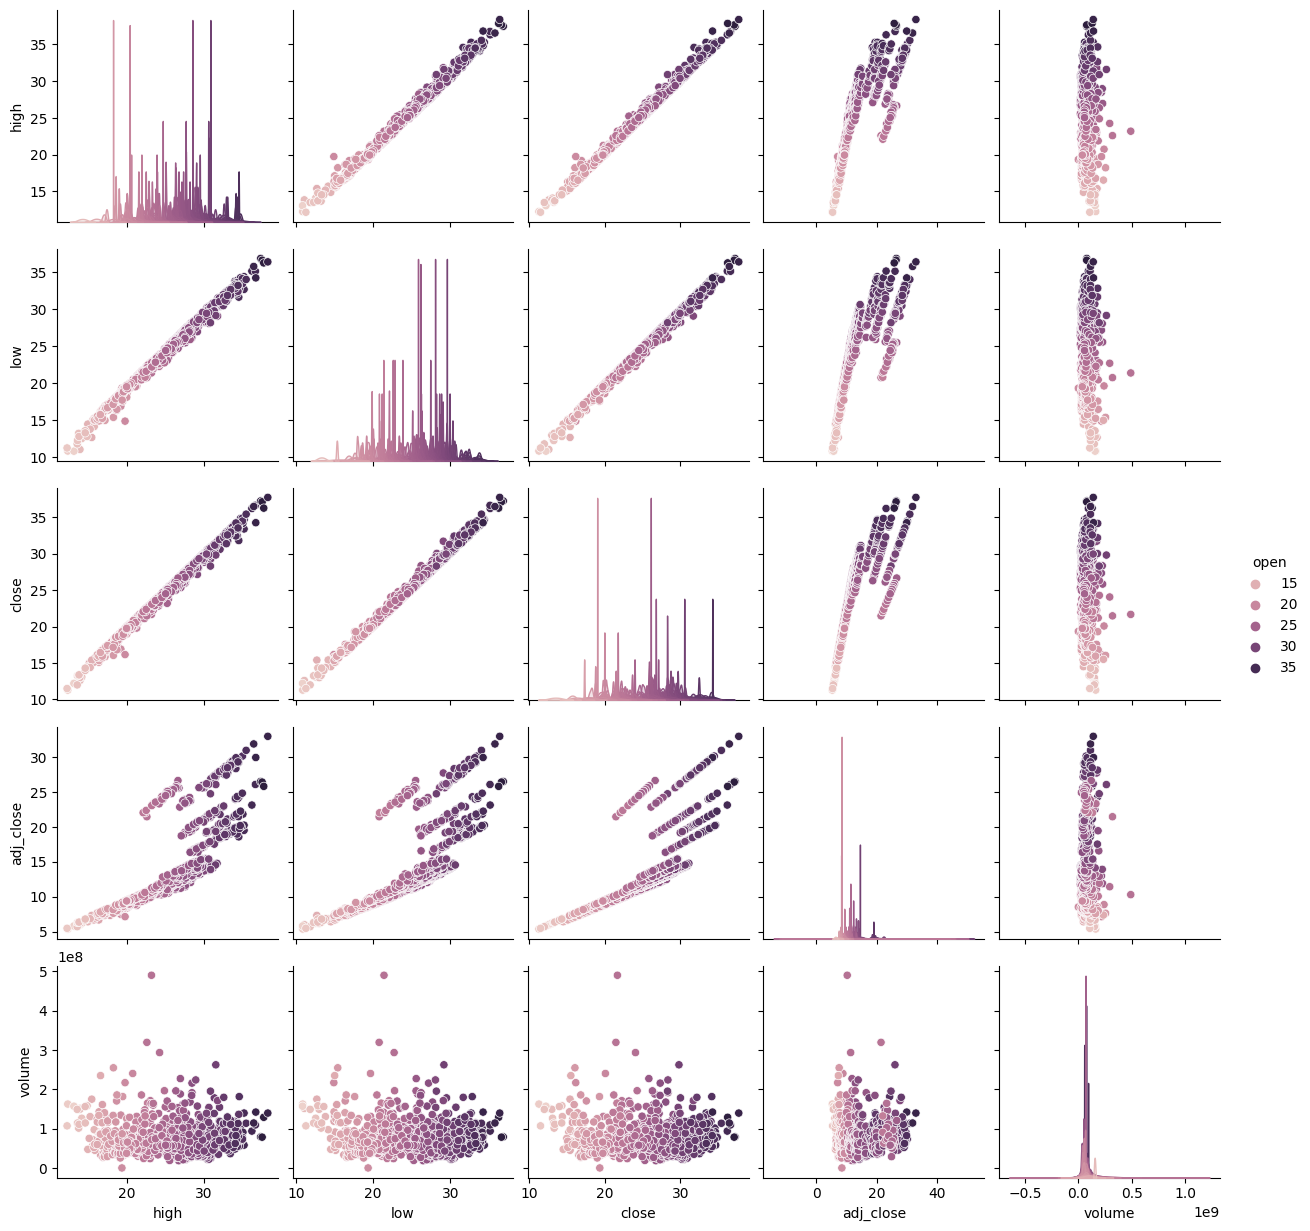

In [156]:
df_petr4_sa = dataset_cotacoes.where(dataset_cotacoes["ticker"] == "PETR4.SA")
exibir_scater_plot(df_petr4_sa, "open", 2.5)

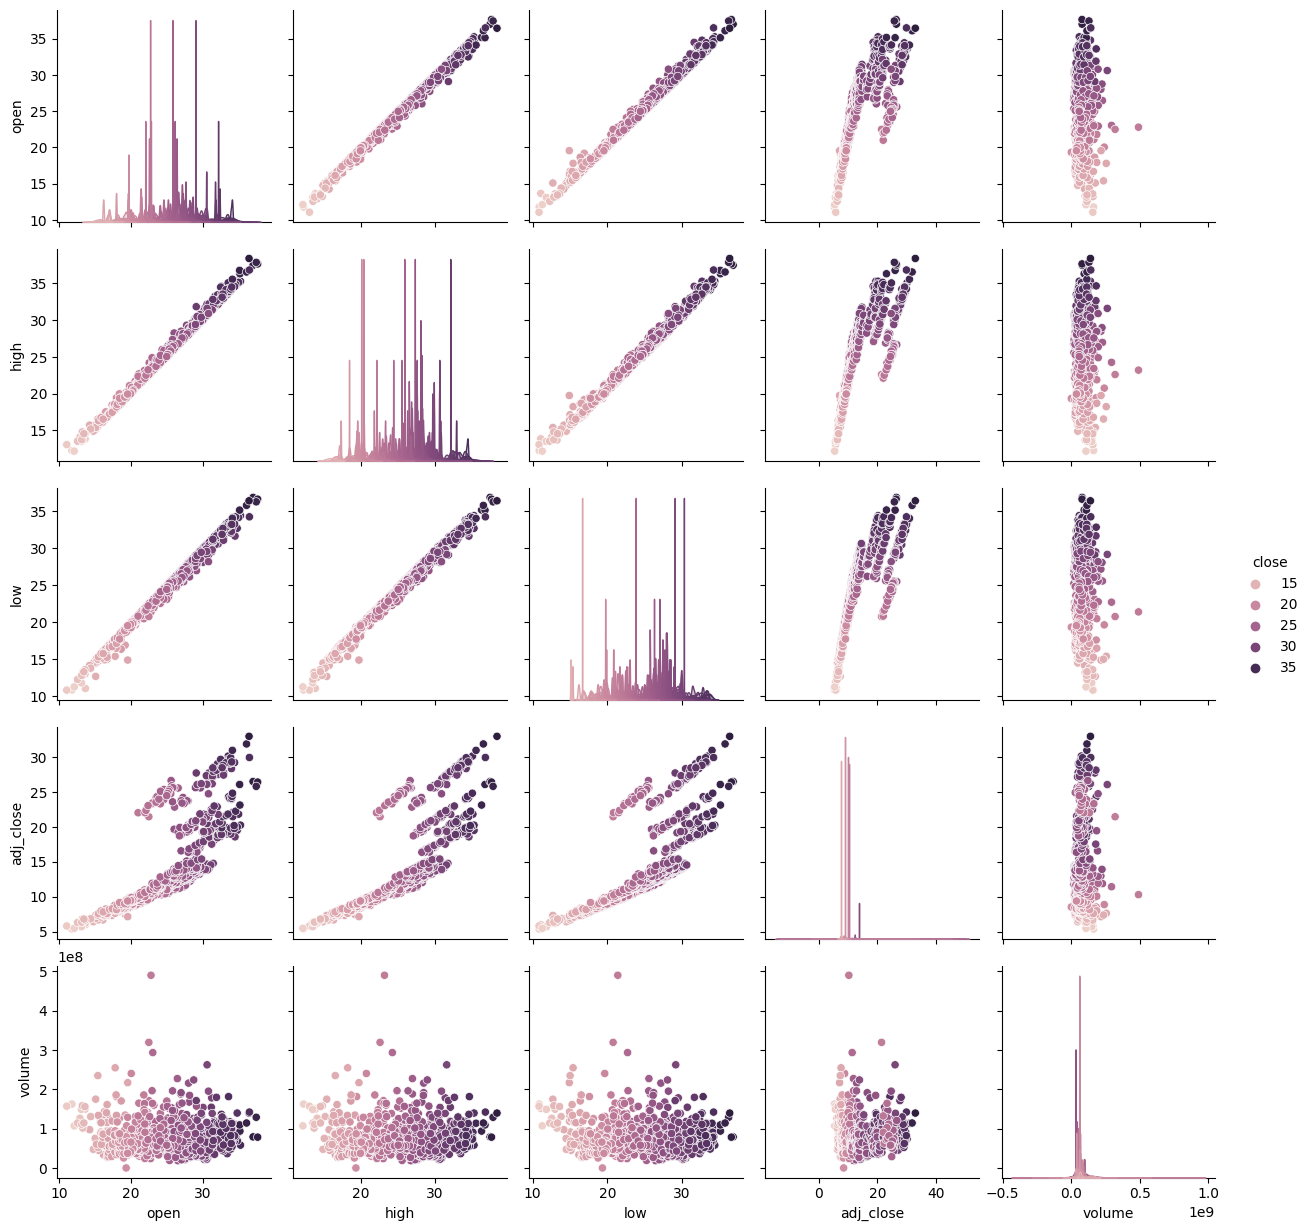

In [157]:

df_petr4_sa = dataset_cotacoes.where(dataset_cotacoes["ticker"] == "PETR4.SA")
exibir_scater_plot(df_petr4_sa, "close", 2.5)

##5. Pré-processamento de Dados

###5.1 Tratamento de Missings

###5.1.1 Verificando existência de Missings

In [158]:
# verificando nulls no dataset

print("dataset_acoes")
print(dataset_acoes.isnull().sum())

print()
print("dataset_cotacoes")
print(dataset_cotacoes.isnull().sum())

print()
print("dataset_indice_bovespa")
print(dataset_indice_bovespa.isnull().sum())

print()
print("dataset_cotacao_dolar")
print(dataset_cotacao_dolar.isnull().sum())

dataset_acoes
ticker    0
dtype: int64

dataset_cotacoes
trading_date    0
ticker          0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64

dataset_indice_bovespa
trading_date    0
ticker          0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64

dataset_cotacao_dolar
trading_date    0
ticker          0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64


Resultado:

Não há elemetos faltantes nos datasets dataset_cotacoes, dataset_indice_bovespa e dataset_cotacao_dolar porque a api usada para buscar as contações retorna apenas as cotações do dia em que houve negociação.

Para os datasets ÍNDICE BOVESPA e COTAÇÃO DÓLAR, o campo VOLUME está sempre com ZERO. Já para o dataset COTAÇÕES, o campo VOLUME está preenchido com valores diversos, a seguir vai ser demonstrado o tratamento de nulos/missings para esse campo, fazendo a substituição de ZERO por NULO.

###5.1.2 Tratando MISSING

###5.1.2.1 Exbindo gráficos de NULIDADE: dataset_cotacoes (original)

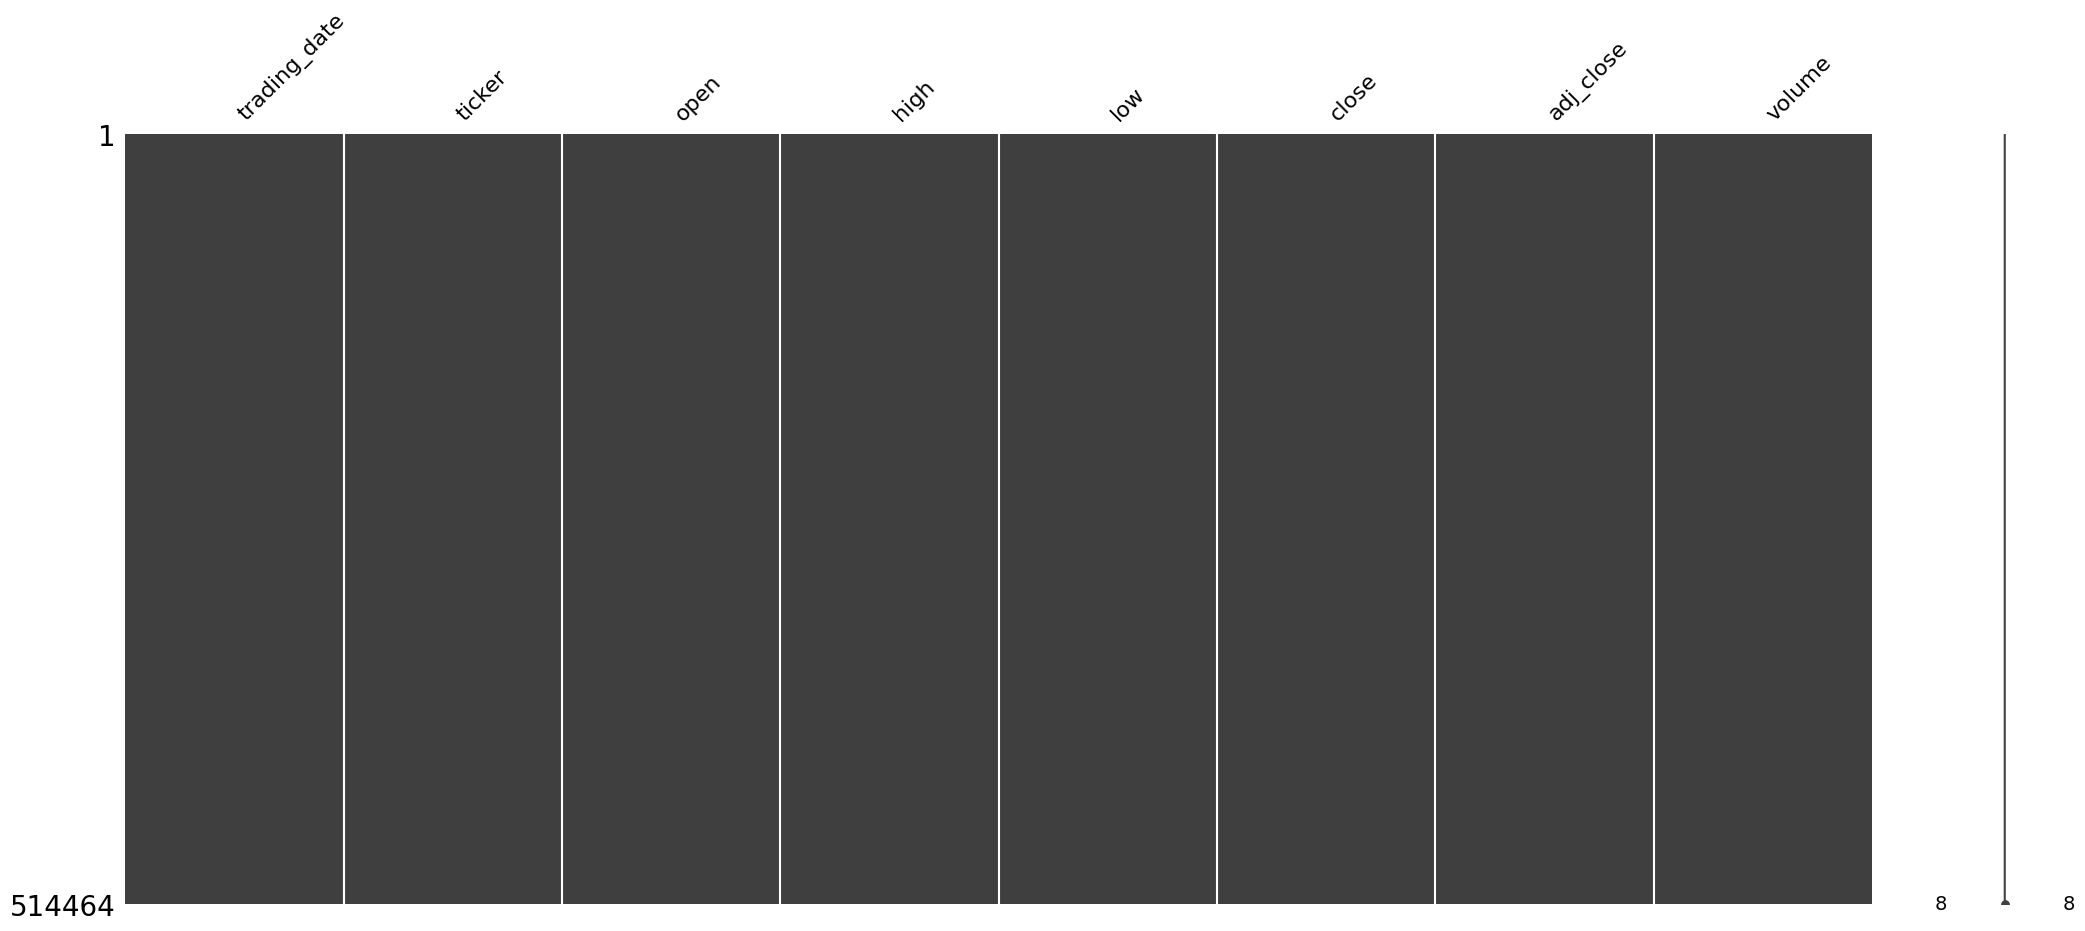

In [159]:
df = exibir_grafico_nulidade(dataset_cotacoes)

###5.1.3 Executando Ações para Tratar MISSINGS


####5.1.3.1 Trocando ZERO por NULO

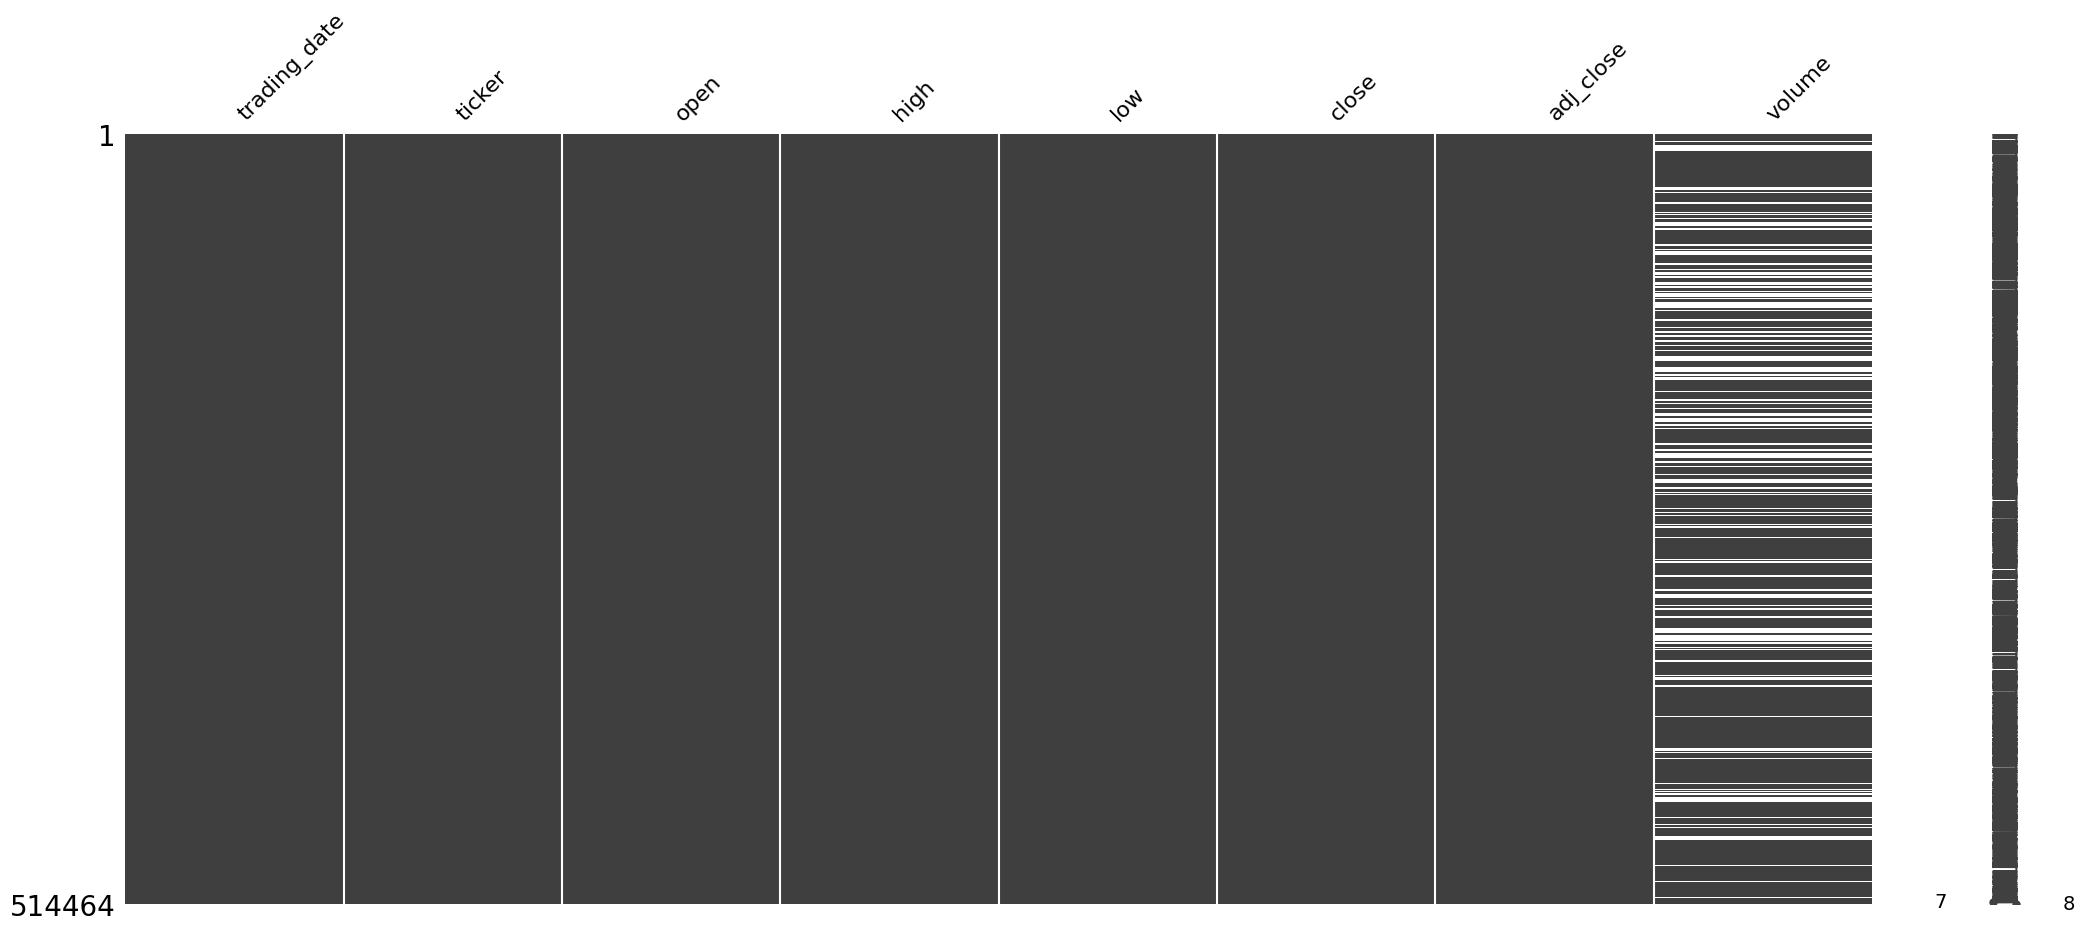

In [160]:
dataset_cotacoes_com_missing = exibir_grafico_nulidade(dataset_cotacoes, troca_por_nulo = 0)

Pesquisando os registros onde a coluna VOLUME está com missing.

In [161]:
index = dataset_cotacoes_com_missing["volume"].isnull()

dataset_cotacoes_com_missing[index]

,trading_date,ticker,open,high,low,close,adj_close,volume
17,2018-01-25,AALR3.SA,14.7500,14.7500,14.7500,14.7500,14.6018,NaN
1256,2018-01-25,ABCB4.SA,18.4652,18.4652,18.4652,18.4652,13.7804,NaN
2495,2018-01-25,ABEV3.SA,21.8900,21.8900,21.8900,21.8900,18.3107,NaN
4695,2018-01-15,AFLT3.SA,5.5000,5.5000,5.5000,5.5000,4.5737,NaN
4696,2018-01-16,AFLT3.SA,5.5000,5.5000,5.5000,5.5000,4.5737,NaN
...,...,...,...,...,...,...,...,...
112372,2019-07-24,YDUQ3.SA,33.5200,33.5200,33.5200,33.5200,32.1395,NaN
112373,2019-07-25,YDUQ3.SA,33.5200,33.5200,33.5200,33.5200,32.1395,NaN
112374,2019-07-26,YDUQ3.SA,33.5200,33.5200,33.5200,33.5200,32.1395,NaN
112375,2019-07-29,YDUQ3.SA,33.5200,33.5200,33.5200,33.5200,32.1395,NaN


Pesquisando os registros onde a coluna VOLUNE não está com missing.

In [162]:
dataset_cotacoes_com_missing[~index]

,trading_date,ticker,open,high,low,close,adj_close,volume
0,2018-01-02,AALR3.SA,14.9400,15.1600,14.7000,14.8900,14.7403,"94,500.0000"
1,2018-01-03,AALR3.SA,14.8900,15.3200,14.7900,14.9600,14.8096,"584,700.0000"
2,2018-01-04,AALR3.SA,15.0000,15.1600,14.8100,15.0900,14.9383,"290,100.0000"
3,2018-01-05,AALR3.SA,15.0500,15.1700,14.9500,15.0500,14.8987,"131,500.0000"
4,2018-01-08,AALR3.SA,15.0500,15.1000,14.6200,14.7900,14.6414,"244,500.0000"
...,...,...,...,...,...,...,...,...
114461,2022-12-23,ZAMP3.SA,4.9700,5.6200,4.9700,5.6200,5.6200,"887,100.0000"
114462,2022-12-26,ZAMP3.SA,5.5000,5.8600,5.4300,5.4800,5.4800,"760,000.0000"
114463,2022-12-27,ZAMP3.SA,5.5200,5.5800,5.2100,5.2800,5.2800,"920,700.0000"
114464,2022-12-28,ZAMP3.SA,5.3500,5.4100,5.2200,5.3500,5.3500,"421,100.0000"


####5.1.3.2 Preenchendo os valores MISSING

##### 1 - Criando um dataset com 6 variações do método de preenchimento de valores nulos/misings para campos numérico não categóricos.

Também exibindo o gráfico de nulidade para o dataset resultante.

,trading_date,ticker,open,high,low,close,adj_close,volume,volume_acumulado,volume_ultimo_valor,volume_diferenca,volume_media,volume_mediana,volume_interpolacao_linear
0,2018-01-02,AALR3.SA,14.9400,15.1600,14.7000,14.8900,14.7403,"94,500.0000","94,500.0000","94,500.0000","94,500.0000","94,500.0000","94,500.0000","94,500.0000"
1,2018-01-03,AALR3.SA,14.8900,15.3200,14.7900,14.9600,14.8096,"584,700.0000","679,200.0000","584,700.0000","584,700.0000","584,700.0000","584,700.0000","584,700.0000"
2,2018-01-04,AALR3.SA,15.0000,15.1600,14.8100,15.0900,14.9383,"290,100.0000","969,300.0000","290,100.0000","290,100.0000","290,100.0000","290,100.0000","290,100.0000"
3,2018-01-05,AALR3.SA,15.0500,15.1700,14.9500,15.0500,14.8987,"131,500.0000","1,100,800.0000","131,500.0000","131,500.0000","131,500.0000","131,500.0000","131,500.0000"
4,2018-01-08,AALR3.SA,15.0500,15.1000,14.6200,14.7900,14.6414,"244,500.0000","1,345,300.0000","244,500.0000","244,500.0000","244,500.0000","244,500.0000","244,500.0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114461,2022-12-23,ZAMP3.SA,4.9700,5.6200,4.9700,5.6200,5.6200,"887,100.0000","2,050,718,800.0000","887,100.0000","887,100.0000","887,100.0000","887,100.0000","887,100.0000"
114462,2022-12-26,ZAMP3.SA,5.5000,5.8600,5.4300,5.4800,5.4800,"760,000.0000","2,051,478,800.0000","760,000.0000","760,000.0000","760,000.0000","760,000.0000","760,000.0000"
114463,2022-12-27,ZAMP3.SA,5.5200,5.5800,5.2100,5.2800,5.2800,"920,700.0000","2,052,399,500.0000","920,700.0000","920,700.0000","920,700.0000","920,700.0000","920,700.0000"
114464,2022-12-28,ZAMP3.SA,5.3500,5.4100,5.2200,5.3500,5.3500,"421,100.0000","2,052,820,600.0000","421,100.0000","421,100.0000","421,100.0000","421,100.0000","421,100.0000"


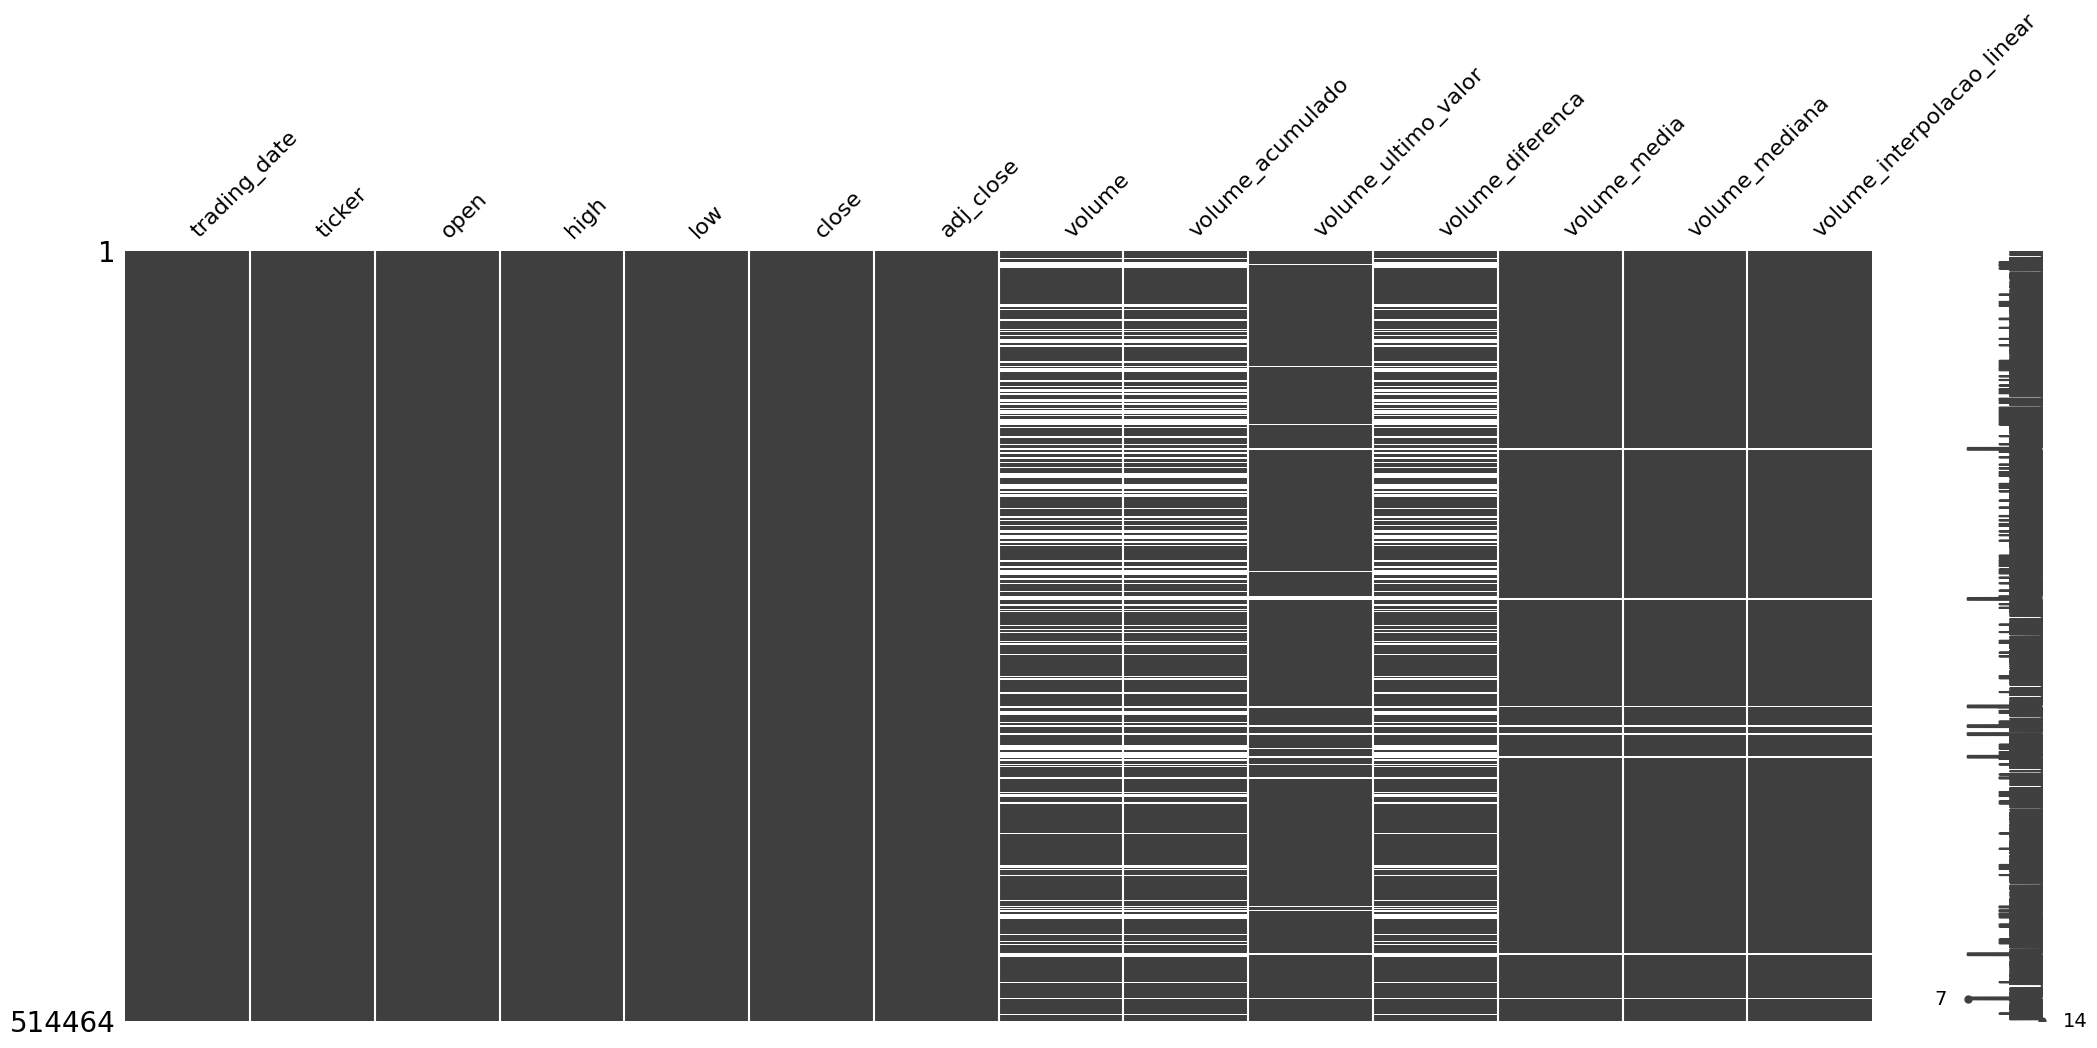

In [163]:

dataset_cotacoes_sem_missing = preencher_nulos_na_serie_temporal(dataset_cotacoes_com_missing, "ticker", "trading_date", ["volume"], True, "acumulado")
dataset_cotacoes_sem_missing = preencher_nulos_na_serie_temporal(dataset_cotacoes_sem_missing, "ticker", "trading_date", ["volume"], True, "ultimo_valor")
dataset_cotacoes_sem_missing = preencher_nulos_na_serie_temporal(dataset_cotacoes_sem_missing, "ticker", "trading_date", ["volume"], True, "diferenca")
dataset_cotacoes_sem_missing = preencher_nulos_na_serie_temporal(dataset_cotacoes_sem_missing, "ticker", "trading_date", ["volume"], True, "media")
dataset_cotacoes_sem_missing = preencher_nulos_na_serie_temporal(dataset_cotacoes_sem_missing, "ticker", "trading_date", ["volume"], True, "mediana")
dataset_cotacoes_sem_missing = preencher_nulos_na_serie_temporal(dataset_cotacoes_sem_missing, "ticker", "trading_date", ["volume"], True, "interpolacao_linear")

exibir_grafico_nulidade(dataset_cotacoes_sem_missing, troca_por_nulo = 0)



#####2 - Pesquinsando onde o campo VOLUME é nulo, para comaparar numericamente a diferença entre os valores calculados, já que quando VOLUNME não for nulo não interessa para a escholha.

In [164]:
df = dataset_cotacoes_sem_missing[(dataset_cotacoes_sem_missing["volume"].isnull())]
df

,trading_date,ticker,open,high,low,close,adj_close,volume,volume_acumulado,volume_ultimo_valor,volume_diferenca,volume_media,volume_mediana,volume_interpolacao_linear
17,2018-01-25,AALR3.SA,14.7500,14.7500,14.7500,14.7500,14.6018,NaN,NaN,"332,100.0000",NaN,"506,506.3005","327,200.0000","288,650.0000"
1256,2018-01-25,ABCB4.SA,18.4652,18.4652,18.4652,18.4652,13.7804,NaN,NaN,"342,481.0000",NaN,"701,262.6317","625,300.0000","462,500.5000"
2495,2018-01-25,ABEV3.SA,21.8900,21.8900,21.8900,21.8900,18.3107,NaN,NaN,"21,173,700.0000",NaN,"23,770,532.2294","20,899,250.0000","18,023,300.0000"
4695,2018-01-15,AFLT3.SA,5.5000,5.5000,5.5000,5.5000,4.5737,NaN,NaN,100.0000,NaN,"3,840.9043","1,100.0000",125.0000
4696,2018-01-16,AFLT3.SA,5.5000,5.5000,5.5000,5.5000,4.5737,NaN,NaN,100.0000,NaN,"3,840.9043","1,100.0000",150.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112372,2019-07-24,YDUQ3.SA,33.5200,33.5200,33.5200,33.5200,32.1395,NaN,NaN,"4,763,800.0000",NaN,"3,493,582.7251","2,963,100.0000","3,829,733.3333"
112373,2019-07-25,YDUQ3.SA,33.5200,33.5200,33.5200,33.5200,32.1395,NaN,NaN,"4,763,800.0000",NaN,"3,493,582.7251","2,963,100.0000","3,362,700.0000"
112374,2019-07-26,YDUQ3.SA,33.5200,33.5200,33.5200,33.5200,32.1395,NaN,NaN,"4,763,800.0000",NaN,"3,493,582.7251","2,963,100.0000","2,895,666.6667"
112375,2019-07-29,YDUQ3.SA,33.5200,33.5200,33.5200,33.5200,32.1395,NaN,NaN,"4,763,800.0000",NaN,"3,493,582.7251","2,963,100.0000","2,428,633.3333"


#####3 - Agrupando os totais por ações

A função **exibir_relatorio_campos_missing** exibe um relatório com a análise de nulos do dataset agrupando pelo campo chave e a coluna ou colunas que podem conter nulo/missings. 

In [165]:
df = exibir_relatorio_campos_missing(dataset_cotacoes_sem_missing,"ticker",["volume"])


       ticker  coluna  total_nulos  total_nao_nulos  percentual_nulos
0    AALR3.SA  volume            1             1238            0.0807
1    ABCB4.SA  volume            1             1238            0.0807
2    ABEV3.SA  volume            1             1238            0.0807
3    AERI3.SA  volume            0              529            0.0000
4    AESB3.SA  volume            0              440            0.0000
..        ...     ...          ...              ...               ...
460  WIZS3.SA  volume            1             1238            0.0807
461  WLMM3.SA  volume          810              429           65.3753
462  WLMM4.SA  volume          123             1116            9.9274
463  YDUQ3.SA  volume            6             1233            0.4843
464  ZAMP3.SA  volume            1             1238            0.0807

[465 rows x 5 columns]


Exibindo quem tem mais de 35% de nulo/missing na coluna VOLUME

In [166]:
print("percentual_nulos > 35")
print(df[df["percentual_nulos"] > 35])


percentual_nulos > 35
       ticker  coluna  total_nulos  total_nao_nulos  percentual_nulos
8    AHEB3.SA  volume         1002              237           80.8717
9    AHEB5.SA  volume         1207               32           97.4173
10   AHEB6.SA  volume         1211               28           97.7401
34   BALM3.SA  volume          919              320           74.1727
35   BALM4.SA  volume          571              668           46.0856
..        ...     ...          ...              ...               ...
424  TKNO3.SA  volume         1247                0          100.0000
425  TKNO4.SA  volume         1128              111           91.0412
441  USIM6.SA  volume         1084              155           87.4899
451  VSPT3.SA  volume         1247                0          100.0000
461  WLMM3.SA  volume          810              429           65.3753

[122 rows x 5 columns]


Exibindo quem tem menos de 35% de nulo/missing na coluna VOLUME

In [167]:
print("percentual_nulos < 35")
print(df[df["percentual_nulos"] < 35])

percentual_nulos < 35
       ticker  coluna  total_nulos  total_nao_nulos  percentual_nulos
0    AALR3.SA  volume            1             1238            0.0807
1    ABCB4.SA  volume            1             1238            0.0807
2    ABEV3.SA  volume            1             1238            0.0807
3    AERI3.SA  volume            0              529            0.0000
4    AESB3.SA  volume            0              440            0.0000
..        ...     ...          ...              ...               ...
459  WIZC3.SA  volume            1             1238            0.0807
460  WIZS3.SA  volume            1             1238            0.0807
462  WLMM4.SA  volume          123             1116            9.9274
463  YDUQ3.SA  volume            6             1233            0.4843
464  ZAMP3.SA  volume            1             1238            0.0807

[343 rows x 5 columns]


Testando a ação ZAMP3.SA, ela possui apenas 1 registro com nulos/missings, isso representa apenas 0.0807% dentro de seu conjunto de cotações.

In [168]:
dataset_cotacoes_sem_missing[(dataset_cotacoes_sem_missing["ticker"] == "ZAMP3.SA")&dataset_cotacoes_sem_missing["volume"].isnull()]



,trading_date,ticker,open,high,low,close,adj_close,volume,volume_acumulado,volume_ultimo_valor,volume_diferenca,volume_media,volume_mediana,volume_interpolacao_linear
113244,2018-01-25,ZAMP3.SA,17.6500,17.6500,17.6500,17.6500,17.4781,NaN,NaN,"811,600.0000",NaN,"1,659,214.1357","1,360,450.0000","1,037,500.0000"


In [169]:
df = dataset_cotacoes_sem_missing[
    (dataset_cotacoes_sem_missing["ticker"] == "ZAMP3.SA") & 
    (dataset_cotacoes_sem_missing["trading_date"]>="2018-01-15") & 
    (dataset_cotacoes_sem_missing["trading_date"]<="2018-01-31")
    ]
df.tail(20)


,trading_date,ticker,open,high,low,close,adj_close,volume,volume_acumulado,volume_ultimo_valor,volume_diferenca,volume_media,volume_mediana,volume_interpolacao_linear
113236,2018-01-15,ZAMP3.SA,18.0000,18.0200,17.7200,17.7500,17.5771,"169,900.0000","10,880,200.0000","169,900.0000","169,900.0000","169,900.0000","169,900.0000","169,900.0000"
113237,2018-01-16,ZAMP3.SA,17.7200,17.9000,17.5300,17.7300,17.5573,"341,100.0000","11,221,300.0000","341,100.0000","341,100.0000","341,100.0000","341,100.0000","341,100.0000"
113238,2018-01-17,ZAMP3.SA,17.6100,17.7500,17.5700,17.6500,17.4781,"1,187,900.0000","12,409,200.0000","1,187,900.0000","1,187,900.0000","1,187,900.0000","1,187,900.0000","1,187,900.0000"
113239,2018-01-18,ZAMP3.SA,17.7500,17.7500,17.1400,17.6800,17.5078,"1,129,900.0000","13,539,100.0000","1,129,900.0000","1,129,900.0000","1,129,900.0000","1,129,900.0000","1,129,900.0000"
113240,2018-01-19,ZAMP3.SA,17.6700,17.6700,17.4400,17.5000,17.3296,"84,100.0000","13,623,200.0000","84,100.0000","84,100.0000","84,100.0000","84,100.0000","84,100.0000"
113241,2018-01-22,ZAMP3.SA,17.7000,17.7000,17.3100,17.3600,17.1909,"299,800.0000","13,923,000.0000","299,800.0000","299,800.0000","299,800.0000","299,800.0000","299,800.0000"
113242,2018-01-23,ZAMP3.SA,17.2000,17.4600,17.1000,17.2100,17.0424,"464,600.0000","14,387,600.0000","464,600.0000","464,600.0000","464,600.0000","464,600.0000","464,600.0000"
113243,2018-01-24,ZAMP3.SA,17.4200,17.6500,17.1400,17.6500,17.4781,"811,600.0000","15,199,200.0000","811,600.0000","811,600.0000","811,600.0000","811,600.0000","811,600.0000"
113244,2018-01-25,ZAMP3.SA,17.6500,17.6500,17.6500,17.6500,17.4781,NaN,NaN,"811,600.0000",NaN,"1,659,214.1357","1,360,450.0000","1,037,500.0000"
113245,2018-01-26,ZAMP3.SA,17.6500,17.9000,17.1200,17.1600,16.9929,"1,263,400.0000","16,462,600.0000","1,263,400.0000","1,263,400.0000","1,263,400.0000","1,263,400.0000","1,263,400.0000"


####5.1.2.4 - Eliminando Resgistros com Campos Missing

Mesmo fazendo os tratamentos para preenchimento dos campos nulos/missing, muitas ações continuam com a coluna VOLUME vazia, por dois motivos:
1.   todos os registros da série temporal estão com missing, ou;
2.   a maioria dos registros da série temporal estão com missing impossibilitanto o cálculo.

       ticker  coluna  total_nulos  total_nao_nulos  percentual_nulos
0    AALR3.SA  volume            1             1238            0.0807
1    ABCB4.SA  volume            1             1238            0.0807
2    ABEV3.SA  volume            1             1238            0.0807
3    AERI3.SA  volume            0              529            0.0000
4    AESB3.SA  volume            0              440            0.0000
..        ...     ...          ...              ...               ...
460  WIZS3.SA  volume            1             1238            0.0807
461  WLMM3.SA  volume          810              429           65.3753
462  WLMM4.SA  volume          123             1116            9.9274
463  YDUQ3.SA  volume            6             1233            0.4843
464  ZAMP3.SA  volume            1             1238            0.0807

[465 rows x 5 columns]


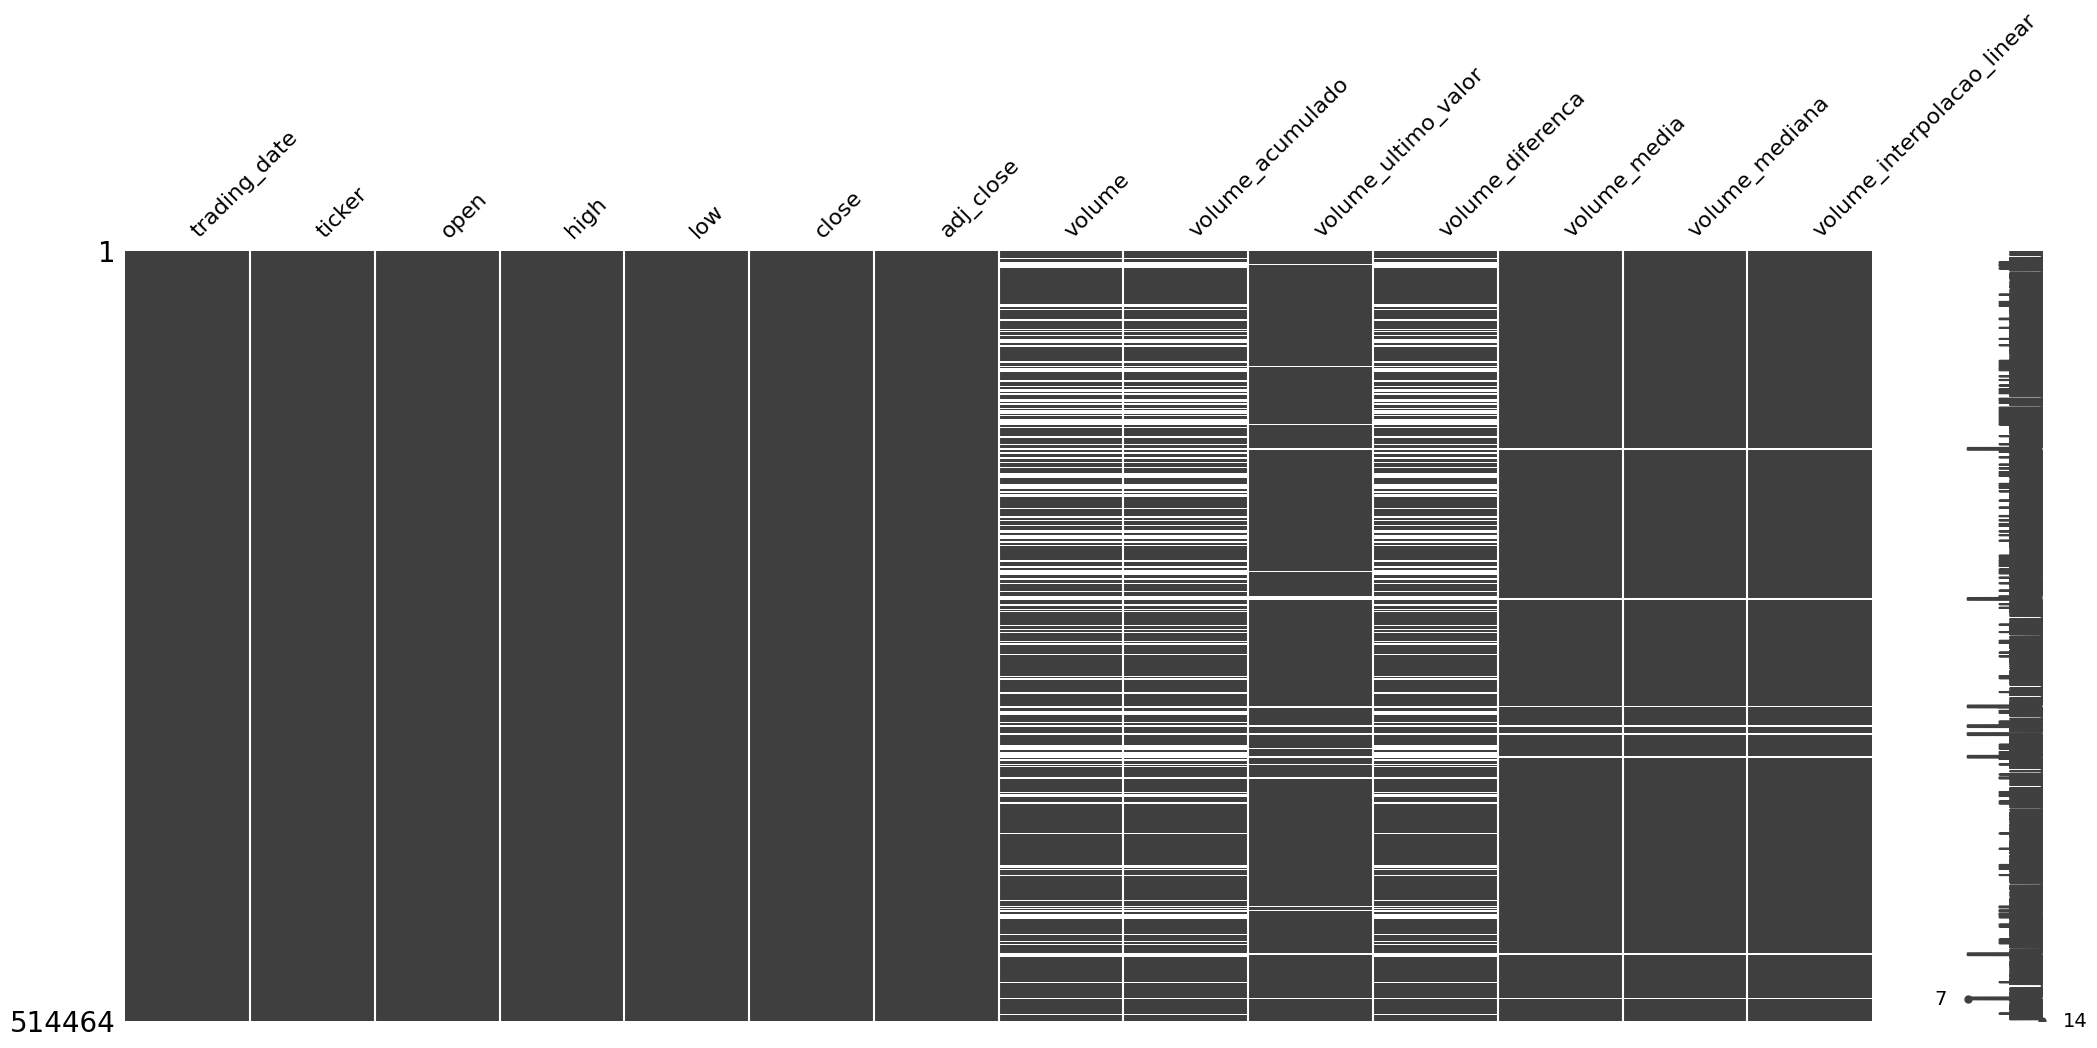

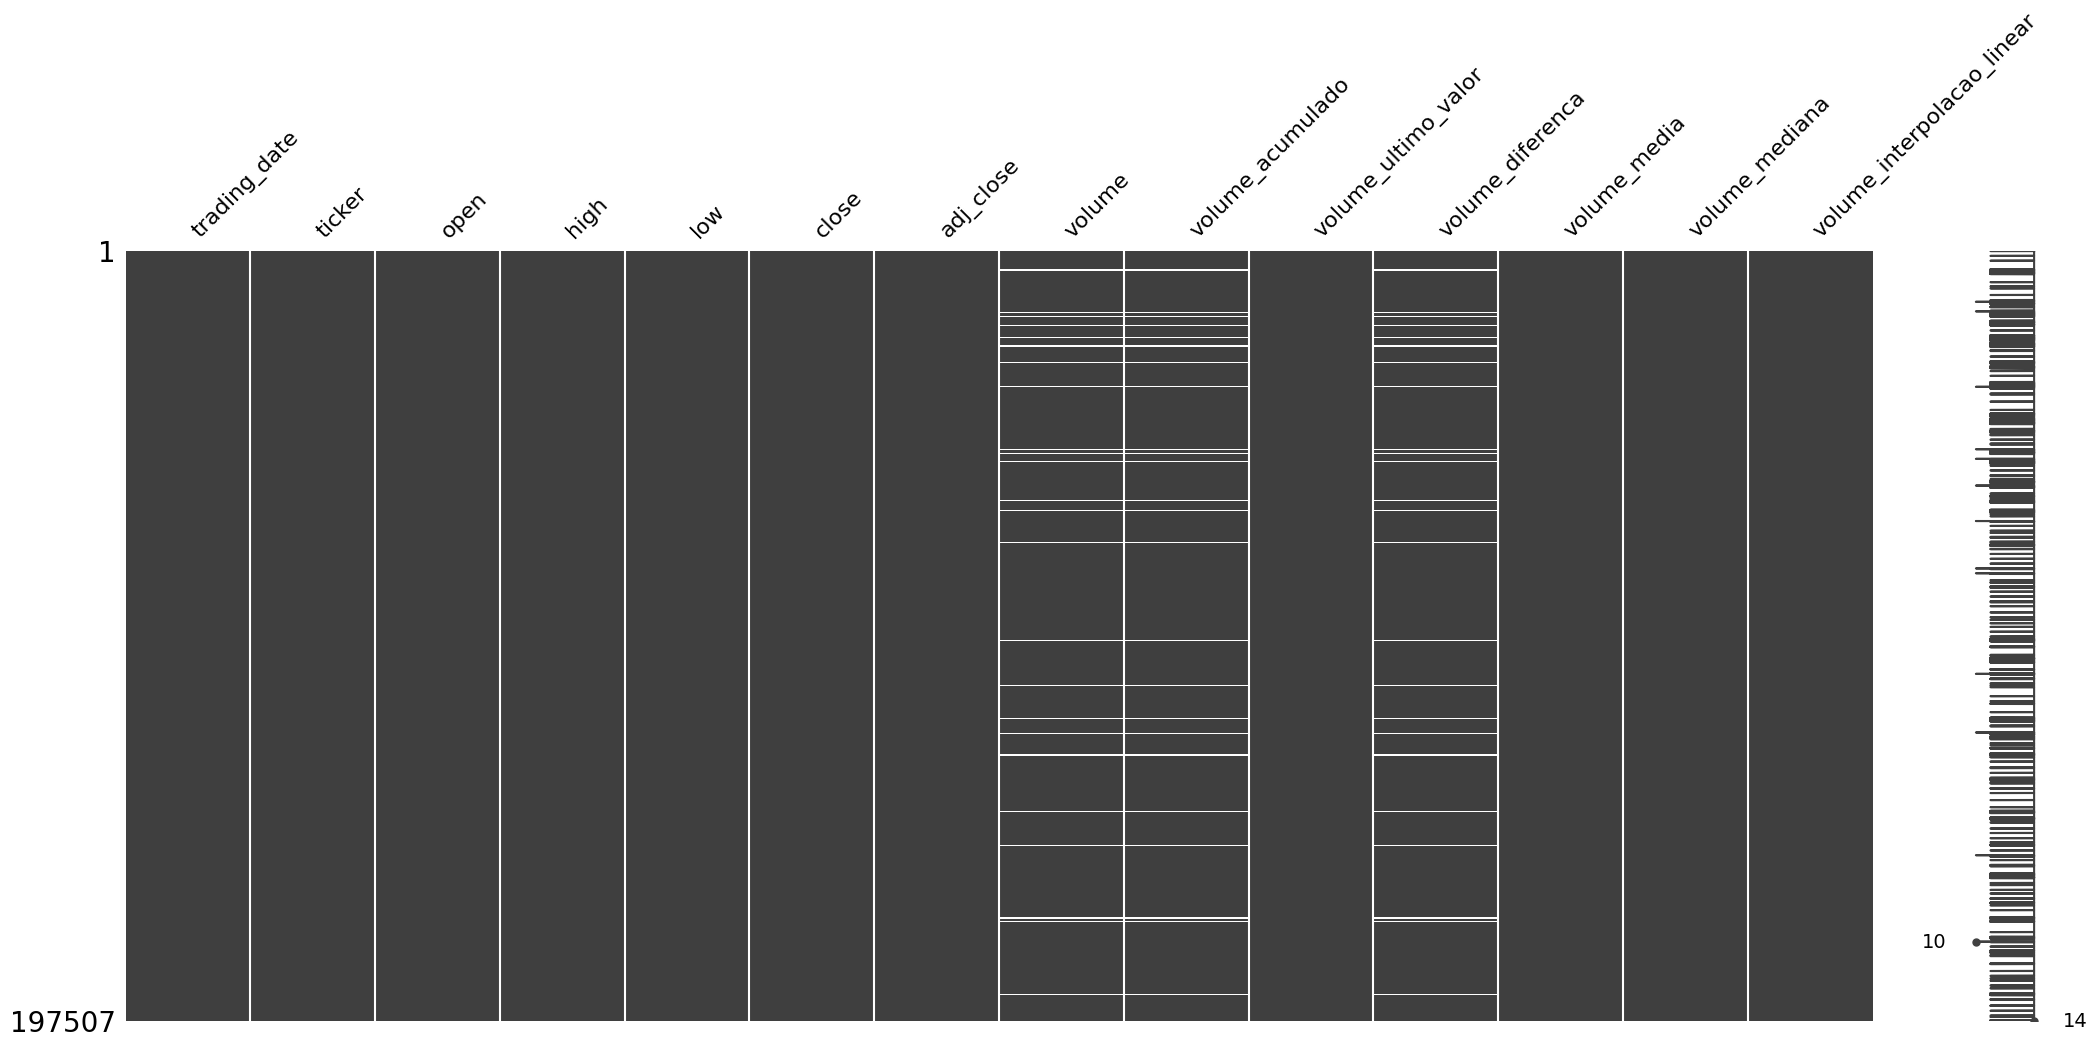

In [170]:
# exibe um relatório e retorna um dataset
df = exibir_relatorio_campos_missing(dataset_cotacoes_sem_missing,"ticker",["volume"])

# lista das ações com mais de 35% de missings no campo VOLUME
lista_excluir = df[df["percentual_nulos"] > 35]["ticker"].tolist()

# exibe um gráfico de nulidade antes da remoção das ações com muitos missings
df_com_missing = exibir_grafico_nulidade(dataset_cotacoes_sem_missing, troca_por_nulo = 0)

# remove as ações contidas na lista
dataset_cotacoes_sem_missing = remover_serie_temporal(dataset_cotacoes_sem_missing,"ticker",lista_excluir)

# exibe o gráfico de nulidade depois da remoção dos missings
df_sem_missing = exibir_grafico_nulidade(dataset_cotacoes_sem_missing, troca_por_nulo = 0)


####5.1.4 Tratamento de Missings: Analisando Resultados

1.   Analisando o dataset resultante após a execução do método preenhcher_nulos_por_interpolacao, usando todas as variações, nota-se que ainda existe muitos registros onde a coluna VOLUME continua com valores nulos/missings.


              ticker         percentual_nulos
              AHEB3.SA       80.8717%
              AHEB5.SA       97.4173%
              AHEB6.SA       97.7401%
              BALM3.SA       74.1727%
              BALM4.SA       46.0856%
              ...            ...
              TKNO3.SA       100.0000%
              TKNO4.SA       91.0412%
              USIM6.SA       87.4899%
              VSPT3.SA       100.0000%
              WLMM3.SA       65.3753%

2.   Foi feito um procedimento de remoção das cotações que a quantidade de nulos/missing fosse maior que 35%, dessa forma, o dataset reduziu de tamanho, de 514.464 passou para 197.507 registros.

3. Os campos calculados:

      3.1.volume_acumulado: o resultado é o somatório do registro atual e dos anteriores, pode ser últil para analisar as grandezas e identificar se a coluna está vazia num dataset com múltiplas séries temporais. Isso fica evidente do gráfico de nulidade;

      3.2 volume_ultimo_valor: apenas preenche os valores nulos/missing com o último valor válido do campo no dataset;

      3.3 volume_diferenca: tenta preencher o valor nulo/missing do registro, usando os valores válidos dos registros anteriores e posteriores a ele. Quando a série temporal possui muitos registros nulos/missings em sequência o resultado não é satisfatório;

      3.4 volume_media: preenche os valores nulos/missings com a média, o cálculo foi feito sobre a média da ação, desconsiderando as outras ações. 

      3.5 volume_mediana: preenche os valores nulos/missings com a mediana, o resultado foi obtido a partir dos registros da ação, desconsiderando as outras ações. 
      
      3.6 volume_interpolacao_linear: usa uma técnica matemática que usa informações dos pontos adjacentes ao registro com nulo/missing, traçando uma linha entre os pontos para calcular o valor faltante.

4. Analisando os resultados:

    Dentre os campos calculados para o preenchimento dos nulos/missings da coluna VOLUME, a interpolaçao linear obteve um resultado mais próximo, segue exemplo da **ZAMP3.SA** que possui apenas um nulo/missing...

        em 2018-01-24, o volume negociado de ZAMP3.SA foi de 811,600

        em 18-01-25, o volume negociado de ZAMP3.SA está vazio

        já em 2018-01-26 , o volume negociado passo para 1,263,400, indicando um aumento

        a mediana do VOLUME da ZAMP3.SA é 1,360,450, sendo ela maior que o valor do dia seguinte

        já o valor da interpolação linear é 1,037,500 que está entre os valores dos dias  2018-01-24 e  2018-01-26

###5.2 Normalização

O dataset escolhido para fazer a normalização dos dados foi o dataset_cotacoes_sem_missing.

Serão removidas as colunas com as varições de preenchimeto de nulos/missings para a coluna VOLUME, mantendo apenas VOLUME_INTERPOLACAO_LINEAR que sobreescreverá a própia coluna VOLUME.

####5.2.1 Removendo Colunas

Serão mantidos as seguintes colunas no dataset dataset_cotacoes_sem_missing:
>
          trading_date
          ticker 	
          open 	
          high 	
          low 	
          close 	
          adj_close 	
          volume recebendo volume_interpolacao_linear

In [171]:
df = dataset_cotacoes_sem_missing.iloc[:,1:8]
df["volume"] = dataset_cotacoes_sem_missing["volume_interpolacao_linear"]
dataset_cotacoes_sem_missing = df

####5.2.1 Fazendo a Normalização

A função **normalizar_dataset** recebe o dataset original e retorna uma cópia dele normalizado.

Não são todas as colunas que serão normalizadas, pois TICKER é um texto e VOLUME foi usado para analisar que cotações eram válidas e na próxima fase do projeto VOLUME será descartado. Por isso, a função **normalizar_dataset** recebe o índice inicial e final das colunas que serão normalizadas.

No resultado retornado, as colunas terão seus valores variando entre 0 e 1.



In [172]:
dataset_cotacoes_sem_missing_normalizado = normalizar_dataset(dataset_cotacoes_sem_missing, 1 , 6)

print("sem normalizar")
print(dataset_cotacoes_sem_missing)
print("")
print("normalizado")
print(dataset_cotacoes_sem_missing_normalizado)


sem normalizar
          ticker    open    high     low   close  adj_close       volume
0       AALR3.SA 14.9400 15.1600 14.7000 14.8900    14.7403  94,500.0000
1       AALR3.SA 14.8900 15.3200 14.7900 14.9600    14.8096 584,700.0000
2       AALR3.SA 15.0000 15.1600 14.8100 15.0900    14.9383 290,100.0000
3       AALR3.SA 15.0500 15.1700 14.9500 15.0500    14.8987 131,500.0000
4       AALR3.SA 15.0500 15.1000 14.6200 14.7900    14.6414 244,500.0000
...          ...     ...     ...     ...     ...        ...          ...
110948  WLMM4.SA  4.8000  4.9400  4.8000  4.9400     4.3799   2,300.0000
110949  WLMM4.SA  5.2400  5.2400  4.9500  4.9500     4.3887   1,500.0000
110950  WLMM4.SA  5.0700  5.0700  4.7100  4.7100     4.1760   1,100.0000
110951  WLMM4.SA  4.8300  4.9800  4.7000  4.7000     4.1671   2,800.0000
110952  WLMM4.SA  4.6200  4.7400  4.5100  4.5100     3.9986   3,200.0000

[197507 rows x 7 columns]

normalizado
          ticker   open   high    low  close  adj_close       volume


###5.3. Padronização

A função **padronizar_dataset** recebe o dataset original e retorna uma cópia dele padronizado.

Não são todas as colunas que serão padronizadas, pois TICKER é um texto e VOLUME foi usado para analisar que cotações eram válidas e na próxima fase do projeto VOLUME será descartado. Por isso, a função **padronizar_dataset** recebe o índice inicial e final das colunas que serão normalizadas.

No resultado retornado, os dados das colunas terão média zero e desvio padrão igual a 1. 

A padronização garante que todas as variáveis tenham a mesma escala e que os modelos de aprendizado de máquina tratem todas as variáveis igualmente.



####5.3.1. Fazendo a Padronização

In [173]:
dataset_cotacoes_sem_missing_padronizado = padronizar_dataset(dataset_cotacoes_sem_missing, 1 , 6)

print("sem padronizar")
print(dataset_cotacoes_sem_missing)
print("")
print("padronizado")
print(dataset_cotacoes_sem_missing_padronizado)


sem padronizar
          ticker    open    high     low   close  adj_close       volume
0       AALR3.SA 14.9400 15.1600 14.7000 14.8900    14.7403  94,500.0000
1       AALR3.SA 14.8900 15.3200 14.7900 14.9600    14.8096 584,700.0000
2       AALR3.SA 15.0000 15.1600 14.8100 15.0900    14.9383 290,100.0000
3       AALR3.SA 15.0500 15.1700 14.9500 15.0500    14.8987 131,500.0000
4       AALR3.SA 15.0500 15.1000 14.6200 14.7900    14.6414 244,500.0000
...          ...     ...     ...     ...     ...        ...          ...
110948  WLMM4.SA  4.8000  4.9400  4.8000  4.9400     4.3799   2,300.0000
110949  WLMM4.SA  5.2400  5.2400  4.9500  4.9500     4.3887   1,500.0000
110950  WLMM4.SA  5.0700  5.0700  4.7100  4.7100     4.1760   1,100.0000
110951  WLMM4.SA  4.8300  4.9800  4.7000  4.7000     4.1671   2,800.0000
110952  WLMM4.SA  4.6200  4.7400  4.5100  4.5100     3.9986   3,200.0000

[197507 rows x 7 columns]

padronizado
          ticker    open    high     low   close  adj_close       vol

###5.4. Eliminado Valores Repetidos

Durante a análise descritiva do dataset dataset_acoes, foi visto que a diferençao entre o total de registros e o total de registros únicos era 2, indicando a existência de registros duplicados.

análise descritiva do dataset:

      ticker

      count        526

      unique       524

      top     IGTI4.SA
      
      freq           2

Fazendo uma pesquisa descendente pela quantidade de resgistro obteve-se;

      ticker

      IGTI4.SA     2

      IGTI3.SA     2

      AALR3.SA     1

      MRSA3B.SA    1

      MRSA6B.SA    1

####5.4.1. Eliminado Valores Repetidos

In [174]:
dataset_acoes = dataset_acoes.drop_duplicates()
dataset_acoes

,ticker
0,AALR3.SA
1,ABCB4.SA
2,ABEV3.SA
3,AERI3.SA
4,AESB3.SA
...,...
521,WIZS3.SA
522,WLMM3.SA
523,WLMM4.SA
524,YDUQ3.SA


In [175]:
exibir_analise_descritiva(dataset_acoes)

informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 525
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ticker  524 non-null    object
dtypes: object(1)
memory usage: 8.2+ KB

primeiras linhas do dataset:
     ticker
0  AALR3.SA
1  ABCB4.SA
2  ABEV3.SA
3  AERI3.SA
4  AESB3.SA

últimas linhas do dataset:
       ticker
521  WIZS3.SA
522  WLMM3.SA
523  WLMM4.SA
524  YDUQ3.SA
525  ZAMP3.SA

colunas do dataset:
ticker    object
dtype: object

análise descritiva do dataset:
          ticker
count        524
unique       524
top     AALR3.SA
freq           1


###6. Conclusão


A análise foi feita em cima das cotações de ações já negociadas na BOVESPA no perído de 2018 a 2022.

Durante o processo de investigação verificou-se que:

*   existe uma forte correlação entre as variáveis do dataset de cotações de ações;

*   com a finalidade de tentar enriquecer o trabalho, foi feita a carga de mais dois datasets: índices bovespa de 2018 a 2022; mas não havia correlação entre esses dois datasets e o dataset de cotações de ações;

*   durante a análise dos missings, ou campos com valores nulos, foi executada a função exibir_grafico_nulidade(...), sem fazer substituição de valores, viu-se que nenhuma coluna do dataset cotações de ações possuia  valores nulos; então foi executada novamente a função exibir_grafico_nulidade, agora substituindo os valores das colunas numéricas não categóricas, dessa forma a coluna VOLUME se destacou;

*   o tratamento realizado na coluna VOLUME, do dataset cotações de ações, foi a interpolação linear; esse método tenta traçar uma linha reta entre dois pontos com valores não nulos, e a partir daí calcular o valor da coluna

*   mesmo aplicando os tratamentos para missings havia muitos registros que não foi possível calcular o novo valor; isso levou a conclusão que não houve negociação apesar do retorno da API;

*   para resolver esse problema, todas as ações que tivessem mais de 35% de valores missing na columa VOLUME, seriam removidas do dataset (método remover_serie_temporal), com isso houve uma redução de 61.6%,  de 514.464 passou para 197.507 registros;


Outras ações:

*   normalização do dataset cotações de ações (novo dataset), foi aplicada a normalização no dataset como todo, não foi feita a individualização por ação; já que o objetivo é agrupar semelhantes, ao fazer a normalização em todos o dataset as diferenças de comportamento das ações serão destacadas;

*   padronização do dataset cotações de ações (novo dataset), foi aplicada a padronização no dataset como todo, não foi feita a individualização por ação; a padronização garante que todas as variáveis tenham a mesma escala e que os modelos de aprendizado de máquina tratem todas as variáveis igualmente;

*   remoção de duplicidades, o dataset lista de ações foi usado para pesquisar as cotações das ações, não tem muita relevância, mas durante a anállise dele, verificou-se que havia elementos repetidos no dataset, com a intenção de demonstrar como se trata registros repetidos, foi feita a remoção desses registros;

Para finalizar, como o objetivo é determinar grupos de ações semelhantes então técnicas de aprendizado de máquinas não supervisionadas são mais apropriadas, por isso não foram criados datasets de treino e teste nesse etapa de pré-processamento.





